План работ:
----

1. Загрузка данных Нахождение ошибок и пропусков. Обшее ознокомление с данными

2. Исследовательский анализ и предобработка данных Исправления выявленных ошибок и формирования новых признаков м визуилизацией и анализом данных

3. Объединение данных Объединение данных

4. Исследовательский анализ и предобработка данных объединённого датафрейма. Для обьедененой таблицы

5. Подготовка данных Разделение на обучающую и тестовую выборку. Масштабирование данных

6. Обучение моделей машинного обучения (обучим 4 ниже стоящих модели)
    
    6.1  LinearRegression

    6.2 RandomForestRegressor

    6.3 CatBoostRegressor

    6.4 LGBMRegressor

7. Выбор лучшей модели

8. Общий вывод и рекомендации заказчику


In [177]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import  DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor, Pool
from sklearn.ensemble import RandomForestRegressor
import shap
from sklearn.dummy import DummyRegressor
import lightgbm as lgb


In [163]:
random_state = 91224

1  Загрузка и просмотр данных
---

In [8]:
data_arc = pd.read_csv('datasets/data_arc_new.csv')
data_bulk = pd.read_csv('datasets/data_bulk_new.csv')
data_bulk_time = pd.read_csv('datasets/data_bulk_time_new.csv')
data_gas = pd.read_csv('datasets/data_gas_new.csv')
data_temp = pd.read_csv('datasets/data_temp_new.csv')
data_wire = pd.read_csv('datasets/data_wire_new.csv')
data_wire_time = pd.read_csv('datasets/data_wire_time_new.csv')

Создадим функцию которая будет отоброжать информацию об датасете

In [9]:
def show_data_information(df):
    display(df.head())
    display(df.info())
    display(df.describe())

In [10]:
show_data_information(data_arc)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


None

,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.662752,0.438986
std,934.571502,0.258885,5.873485
min,1.000000,0.223120,-715.479924
25%,806.000000,0.467115,0.337175
50%,1617.000000,0.599587,0.441639
75%,2429.000000,0.830070,0.608201
max,3241.000000,1.463773,1.270284


In [11]:
show_data_information(data_bulk)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.3 KB


None

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


In [12]:
show_data_information(data_bulk_time)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.3+ KB


None

,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000


In [13]:
show_data_information(data_gas)

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None

,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


In [14]:
show_data_information(data_temp)

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


None

,key,Температура
count,18092.000000,14665.000000
mean,1616.460977,1590.722741
std,934.641385,20.394381
min,1.000000,1191.000000
25%,807.750000,1580.000000
50%,1618.000000,1590.000000
75%,2429.000000,1599.000000
max,3241.000000,1705.000000


In [15]:
show_data_information(data_wire)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


In [16]:
show_data_information(data_wire_time)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


None

,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


Предобработка и Анализ данных
---

Создадим функцию для отображения гистограммы и диаграммы размаха

In [32]:
def graph(df, col, hist_xLbl, box_Lbl ,limits = False, lim_values=[0,100]):
    
    sns.set(style="ticks")
    
    if limits==True:
        fig, [ax1, ax2, ax3] = plt.subplots(ncols=3, figsize = (12,6))
        sns.boxplot(data=df[col], ax = ax3)
        plt.ylim(lim_values)
        ax3.set_xlabel(box_Lbl)
        ax3.title.set_text('Диаграмма размаха (обрезанная) '+ col)
    else:
        fig, [ax1, ax2] = plt.subplots(ncols=2, figsize = (12,6))
    
    ax1.hist(df[col])
    ax1.set_xlabel(hist_xLbl)
    ax1.set_ylabel('Количество')
    ax1.title.set_text('Гистограмма расперделения '+ col)
    
    sns.boxplot(data=df[col], ax = ax2)
    
    #ax2.boxplot(df[col])
    ax2.set_xlabel(box_Lbl)
    ax2.title.set_text('Диаграмма размаха '+ col)
    
    plt.show()
    display(df[col].describe())
    display(f'Число пропусков {df[col].isnull().sum()}' )

Данные об электродах
----

Исправим названия столбцов

In [17]:
rename_columns_arc = {
    'Начало нагрева дугой': 'start_heating',
    'Конец нагрева дугой': 'end_heating',
    'Активная мощность' : 'active',
    'Реактивная мощность' : 'reactive'}

In [18]:
data_arc = data_arc.rename(columns = rename_columns_arc)

Создадим функцию для перевода во временой тип .

In [19]:
def convert_from_ob_to_dtime(df, columns):
    return df[columns].astype('datetime64[ns]')

In [20]:
cols = ['start_heating','end_heating']
data_arc[cols] = convert_from_ob_to_dtime(data_arc,cols)


In [23]:
data_arc.describe()

,key,start_heating,end_heating,active,reactive,time_sec
count,14876.000000,14876,14876,14876.000000,14876.000000,14876.000000
mean,1615.220422,2019-07-05 12:25:51.921081088,2019-07-05 12:28:43.592027392,0.662752,0.438986,171.670946
min,1.000000,2019-05-03 11:02:14,2019-05-03 11:06:02,0.223120,-715.479924,11.000000
25%,806.000000,2019-06-03 23:18:23.249999872,2019-06-03 23:21:35,0.467115,0.337175,107.000000
50%,1617.000000,2019-07-03 01:31:26.500000,2019-07-03 01:35:13,0.599587,0.441639,147.000000
75%,2429.000000,2019-08-07 22:52:20.750000128,2019-08-07 22:56:47,0.830070,0.608201,214.000000
max,3241.000000,2019-09-06 17:24:54,2019-09-06 17:26:15,1.463773,1.270284,907.000000
std,934.571502,NaN,NaN,0.258885,5.873485,98.186803


Удалим негaтивные значения в таблице

In [25]:
index = data_arc[(data_arc['reactive']<0)].index
len(index)

1

In [26]:
data_arc.drop(index,inplace=True)

Посчитаем время нагрева в секундах

In [27]:
data_arc['time_sec'] = (data_arc['end_heating'] - data_arc['start_heating']).apply(lambda x: x.total_seconds())

In [28]:
data_arc['time_sec'] = data_arc['time_sec'].astype(int)

Так же из активной и реактивной мощьности мы можем найти полную мощьность

"Комбинация реактивной и активной мощностей называется полной мощностью. Полная мощность = √ (Активная мощность2 + Реактивная мощность2)"



In [37]:
data_arc['total_power'] = (data_arc['active']**2 + data_arc['reactive']**2)**0.5

In [38]:
data_arc.info()
data_arc.head()

<class 'pandas.core.frame.DataFrame'>
Index: 14875 entries, 0 to 14875
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   key            14875 non-null  int64         
 1   start_heating  14875 non-null  datetime64[ns]
 2   end_heating    14875 non-null  datetime64[ns]
 3   active         14875 non-null  float64       
 4   reactive       14875 non-null  float64       
 5   time_sec       14875 non-null  int32         
 6   total_power    14875 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int32(1), int64(1)
memory usage: 1.4 MB


,key,start_heating,end_heating,active,reactive,time_sec,total_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,228,0.371123
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,185,0.902319
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,172,0.722536
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,365,0.642824
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,148,1.079934


In [39]:
data_arc.duplicated().sum()

0

Проведем анализ данных электродов

Сразу обозначиним план действия на случай выявления выбросов. В случае если в данных есть выбросы будем их остовлять. В виду пожелания заказчика. Но в случии наличия аномалий , аномальные данные будут удалятся

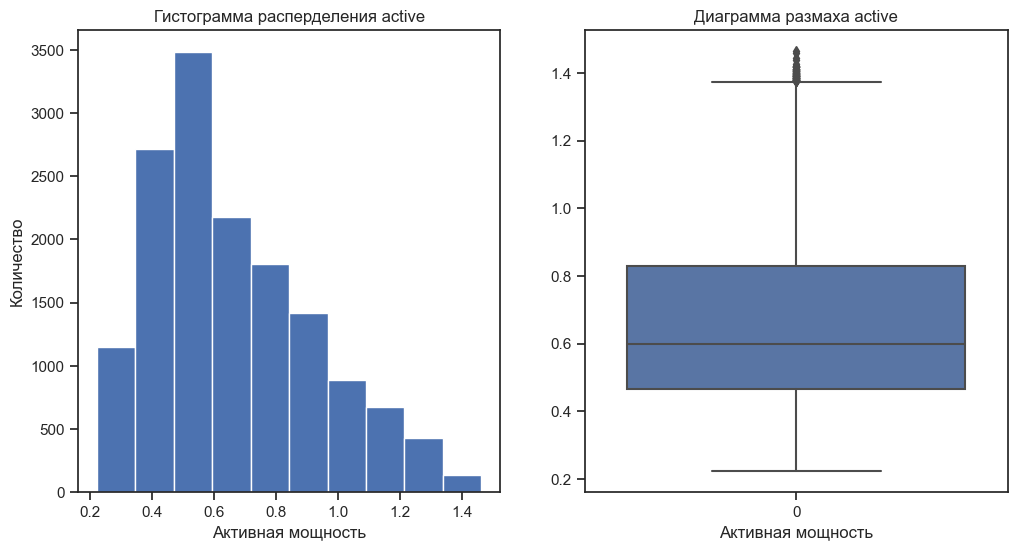

count    14875.000000
mean         0.662749
std          0.258894
min          0.223120
25%          0.467115
50%          0.599578
75%          0.830135
max          1.463773
Name: active, dtype: float64

'Число пропусков 0'

In [40]:
graph(data_arc, 'active', 'Активная мощность', 'Активная мощность' )

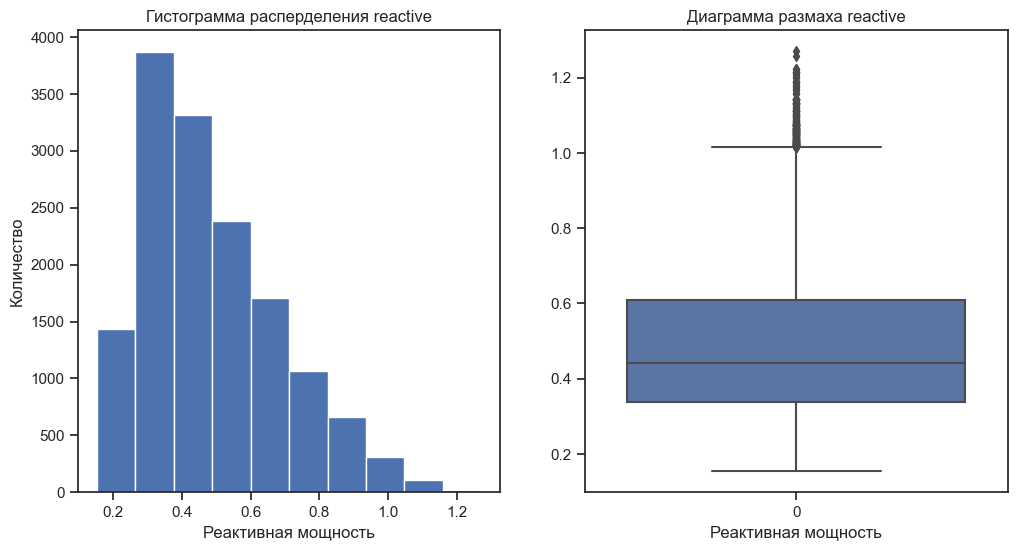

count    14875.000000
mean         0.487115
std          0.197612
min          0.153777
25%          0.337190
50%          0.441665
75%          0.608223
max          1.270284
Name: reactive, dtype: float64

'Число пропусков 0'

In [41]:
graph(data_arc, 'reactive', 'Реактивная мощность', 'Реактивная мощность' )

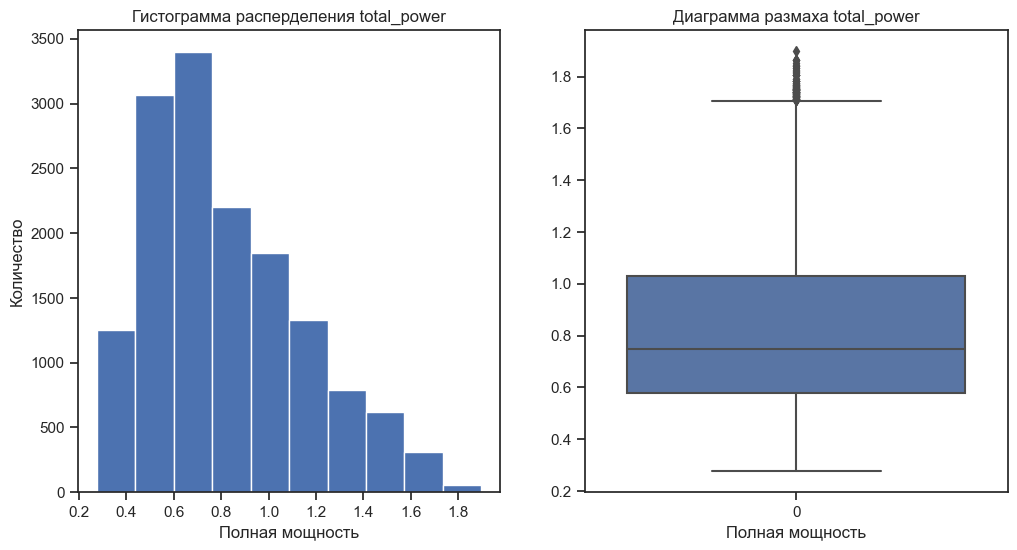

count    14875.000000
mean         0.823385
std          0.323470
min          0.275718
25%          0.578839
50%          0.746554
75%          1.030402
max          1.898158
Name: total_power, dtype: float64

'Число пропусков 0'

In [42]:
graph(data_arc, 'total_power', 'Полная мощность', 'Полная мощность' )

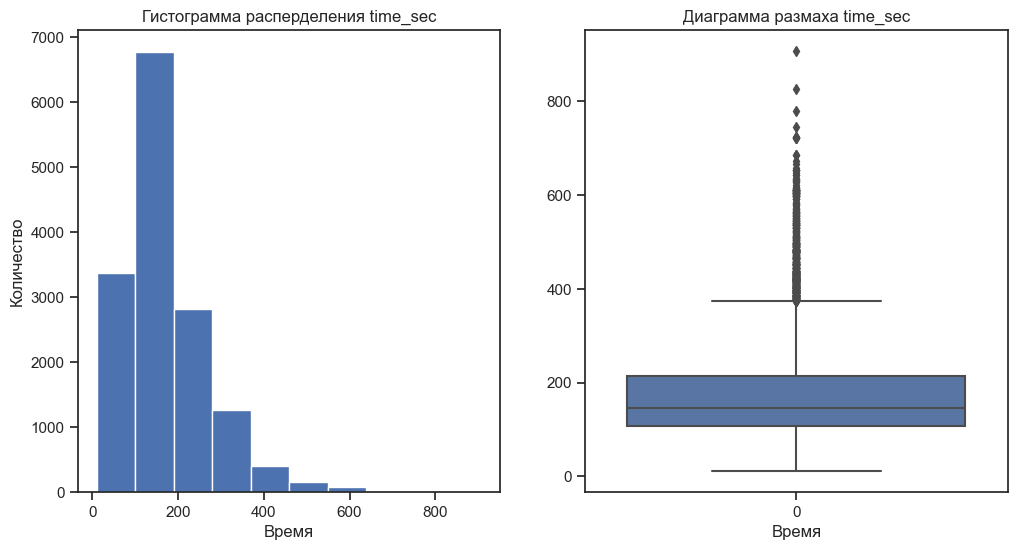

count    14875.000000
mean       171.675160
std         98.188759
min         11.000000
25%        107.000000
50%        147.000000
75%        214.000000
max        907.000000
Name: time_sec, dtype: float64

'Число пропусков 0'

In [43]:
graph(data_arc, 'time_sec', 'Время', 'Время' )

данные о сыпучих материалах (объем)


Улучшим названия столбцов и оставим только те столбы в которых количество пропусков менее 10%. 

In [44]:
data_bulk.columns = data_bulk.columns.str.replace(' ', '_')
data_bulk.columns = data_bulk.columns.str.lower()

Создадим функцию для подсчета количества пропусков. Функция будет возврощять те столбцы в которых число не пропушеных значений больше чем 10%

In [45]:
def hold_columns(df, numbe_null_elem):
    hold_colums = []
    
    for i in df.columns:
        if (df[i].shape[0] - df[i].isnull().sum()) > numbe_null_elem:
            hold_colums.append(i)
        
    return hold_colums

In [46]:
thresh = data_bulk.shape[0]*0.1
print("10 % выборки в количестве равно = ",thresh)
colums = hold_columns(data_bulk, thresh)
data_bulk = data_bulk[colums] 
data_bulk.info()

10 % выборки в количестве равно =  312.90000000000003
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   bulk_3   1298 non-null   float64
 2   bulk_4   1014 non-null   float64
 3   bulk_6   576 non-null    float64
 4   bulk_12  2450 non-null   float64
 5   bulk_14  2806 non-null   float64
 6   bulk_15  2248 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 171.2 KB


In [47]:
data_bulk.describe()

,key,bulk_3,bulk_4,bulk_6,bulk_12,bulk_14,bulk_15
count,3129.000000,1298.000000,1014.000000,576.000000,2450.000000,2806.000000,2248.000000
mean,1624.383509,113.879045,104.394477,118.925347,260.471020,170.284747,160.513345
std,933.337642,75.483494,48.184126,72.057776,120.649269,65.868652,51.765319
min,1.000000,6.000000,12.000000,17.000000,53.000000,16.000000,1.000000
25%,816.000000,58.000000,72.000000,69.750000,204.000000,119.000000,105.000000
50%,1622.000000,97.500000,102.000000,100.000000,208.000000,151.000000,160.000000
75%,2431.000000,152.000000,133.000000,157.000000,316.000000,205.750000,205.000000
max,3241.000000,454.000000,281.000000,503.000000,1849.000000,636.000000,405.000000


 Можно создать новый признык, добавим новый столбец. Средний объем подоваемого материала. И тем самым немного улучшим данные. посчитаем средни по строкам

In [48]:
data_bulk['bulk_mean'] = data_bulk[data_bulk.columns[1:]].mean(axis=1)
data_bulk.head(4)

,key,bulk_3,bulk_4,bulk_6,bulk_12,bulk_14,bulk_15,bulk_mean
0,1,NaN,43.0,NaN,206.0,150.0,154.0,138.25
1,2,NaN,73.0,NaN,206.0,149.0,154.0,145.50
2,3,NaN,34.0,NaN,205.0,152.0,153.0,136.00
3,4,NaN,81.0,NaN,207.0,153.0,154.0,148.75


In [49]:
data_bulk.duplicated().sum()

0

Анализ данных о сыпучих материалах (объем)

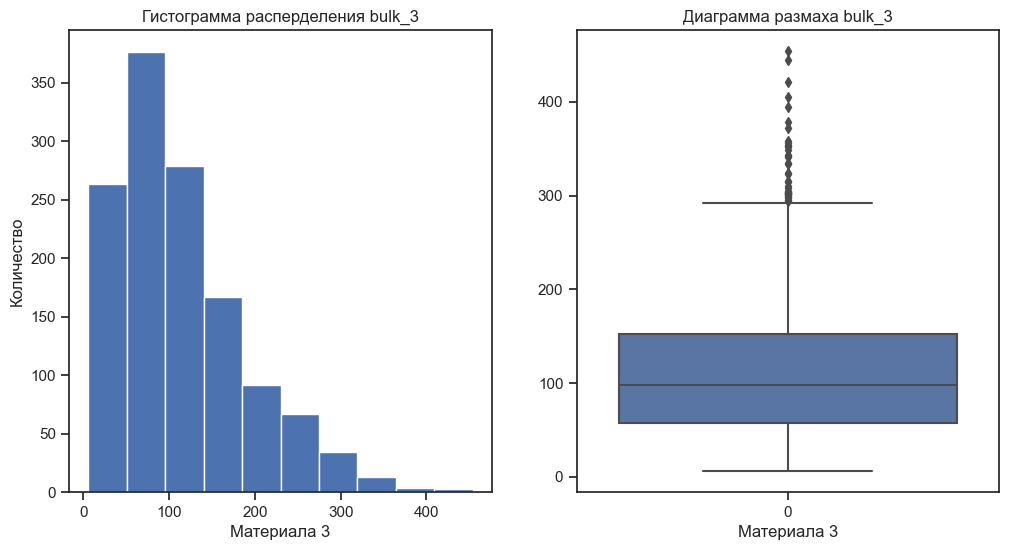

count    1298.000000
mean      113.879045
std        75.483494
min         6.000000
25%        58.000000
50%        97.500000
75%       152.000000
max       454.000000
Name: bulk_3, dtype: float64

'Число пропусков 1831'

In [50]:
graph(data_bulk, 'bulk_3', 'Mатериала 3', 'Mатериала 3' )

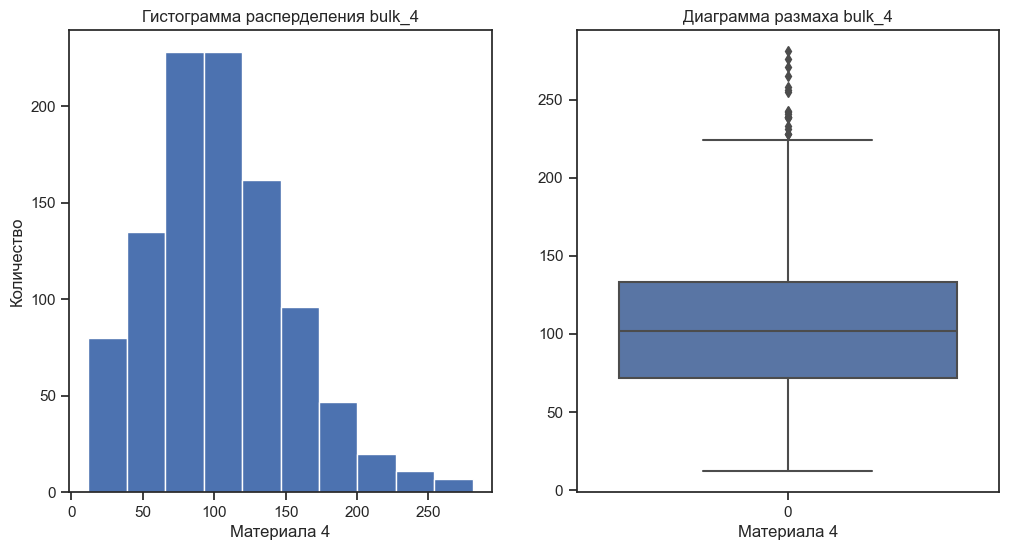

count    1014.000000
mean      104.394477
std        48.184126
min        12.000000
25%        72.000000
50%       102.000000
75%       133.000000
max       281.000000
Name: bulk_4, dtype: float64

'Число пропусков 2115'

In [51]:
graph(data_bulk, 'bulk_4', 'Mатериала 4', 'Mатериала 4' )

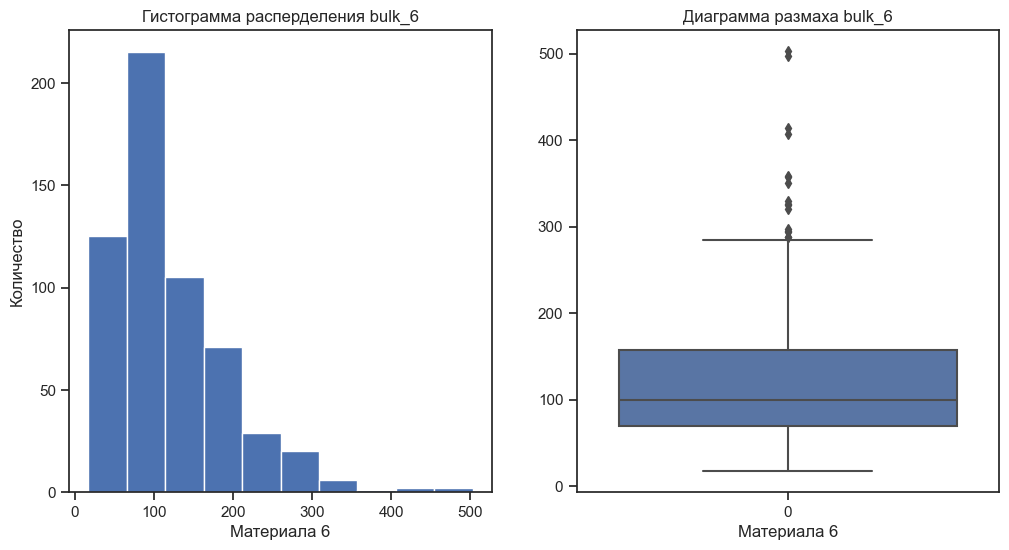

count    576.000000
mean     118.925347
std       72.057776
min       17.000000
25%       69.750000
50%      100.000000
75%      157.000000
max      503.000000
Name: bulk_6, dtype: float64

'Число пропусков 2553'

In [52]:
graph(data_bulk, 'bulk_6', 'Mатериала 6', 'Mатериала 6' )

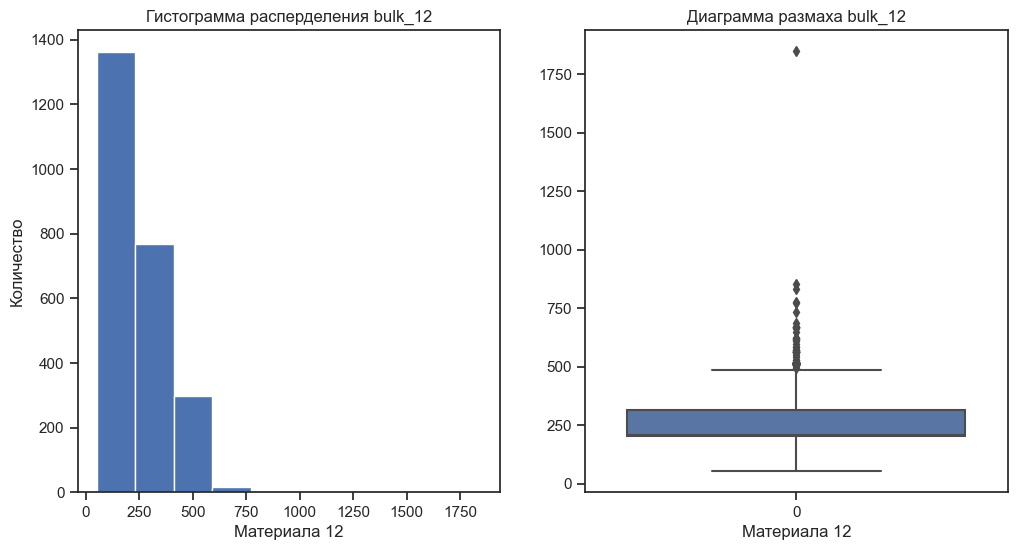

count    2450.000000
mean      260.471020
std       120.649269
min        53.000000
25%       204.000000
50%       208.000000
75%       316.000000
max      1849.000000
Name: bulk_12, dtype: float64

'Число пропусков 679'

In [53]:
graph(data_bulk, 'bulk_12', 'Mатериала 12', 'Mатериала 12' )

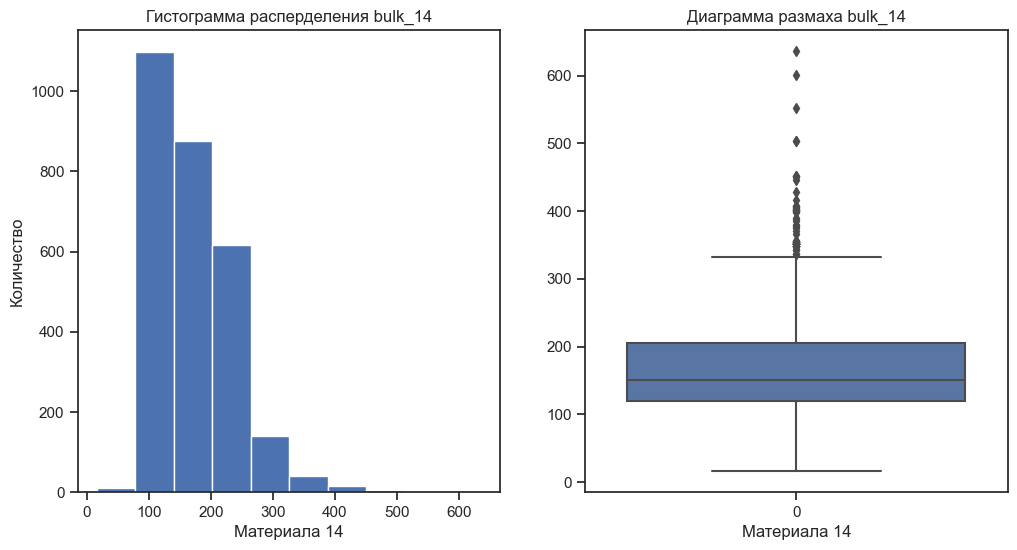

count    2806.000000
mean      170.284747
std        65.868652
min        16.000000
25%       119.000000
50%       151.000000
75%       205.750000
max       636.000000
Name: bulk_14, dtype: float64

'Число пропусков 323'

In [54]:
graph(data_bulk, 'bulk_14', 'Mатериала 14', 'Mатериала 14' )

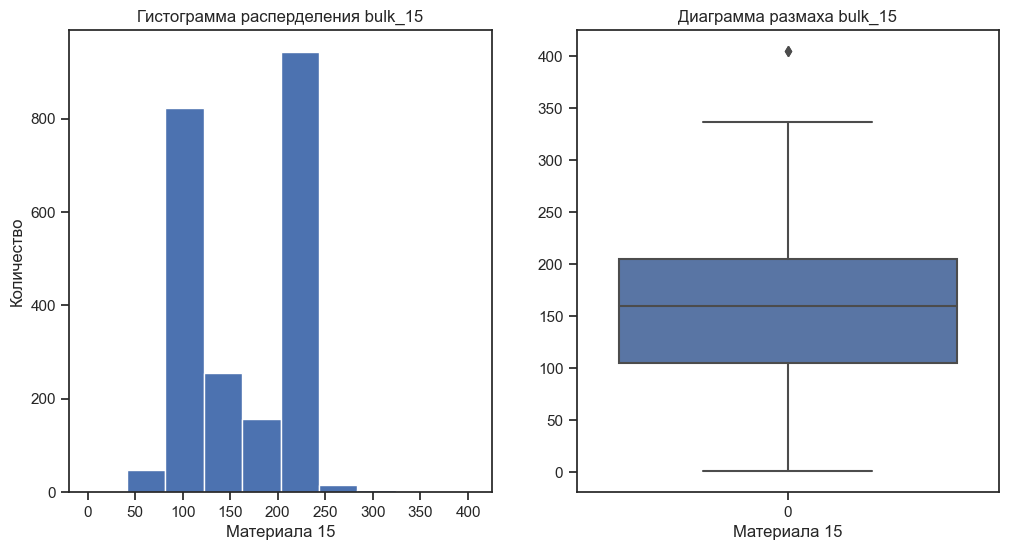

count    2248.000000
mean      160.513345
std        51.765319
min         1.000000
25%       105.000000
50%       160.000000
75%       205.000000
max       405.000000
Name: bulk_15, dtype: float64

'Число пропусков 881'

In [55]:
graph(data_bulk, 'bulk_15', 'Mатериала 15', 'Mатериала 15' )

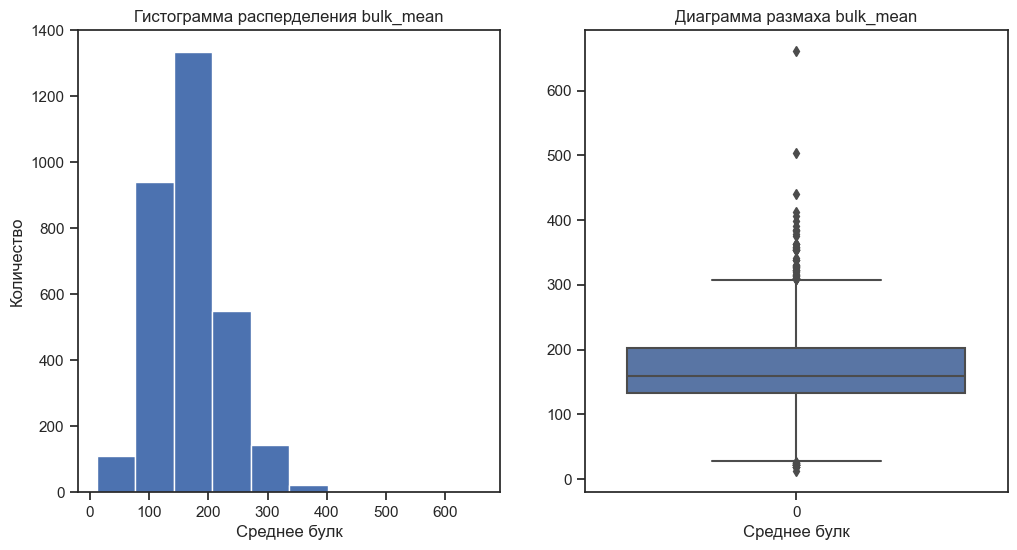

count    3104.000000
mean      169.402040
std        58.244795
min        12.000000
25%       132.437500
50%       159.250000
75%       202.666667
max       661.000000
Name: bulk_mean, dtype: float64

'Число пропусков 25'

In [56]:
graph(data_bulk, 'bulk_mean', 'Среднее булк', 'Среднее булк' )

Подготовка данных сыпучих материалов (время)

Исправим названия столбцов

In [57]:
data_bulk_time.columns = data_bulk_time.columns.str.replace(' ', '_')
data_bulk_time.columns = data_bulk_time.columns.str.lower()

Удалим столбцы с более 90% пропусков

In [58]:
thresh = data_bulk_time.shape[0]*0.1
print(thresh)
colums = hold_columns(data_bulk_time, thresh)
print(colums)
data_bulk_time = data_bulk_time[colums] 


312.90000000000003
['key', 'bulk_3', 'bulk_4', 'bulk_6', 'bulk_12', 'bulk_14', 'bulk_15']


Приведем данные в формат времени

In [59]:
col = colums[1:] #'key' исключим из исписка
data_bulk_time[col] = convert_from_ob_to_dtime(data_bulk_time,col)

In [60]:
display(data_bulk_time.info())
display(data_bulk_time.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   key      3129 non-null   int64         
 1   bulk_3   1298 non-null   datetime64[ns]
 2   bulk_4   1014 non-null   datetime64[ns]
 3   bulk_6   576 non-null    datetime64[ns]
 4   bulk_12  2450 non-null   datetime64[ns]
 5   bulk_14  2806 non-null   datetime64[ns]
 6   bulk_15  2248 non-null   datetime64[ns]
dtypes: datetime64[ns](6), int64(1)
memory usage: 171.2 KB


None

,key,bulk_3,bulk_4,bulk_6,bulk_12,bulk_14,bulk_15
2780,2885,2019-08-24 22:39:40,NaT,NaT,2019-08-24 22:57:38,2019-08-24 22:45:51,2019-08-24 22:39:40
1488,1545,NaT,2019-06-30 16:35:43,NaT,NaT,2019-06-30 16:50:36,NaT
2706,2807,NaT,2019-08-22 03:38:19,NaT,2019-08-22 03:43:03,2019-08-22 03:38:19,2019-08-22 03:32:44
1008,1053,NaT,2019-06-12 23:39:54,NaT,2019-06-12 23:39:54,2019-06-12 23:32:35,2019-06-12 23:27:32
1585,1644,2019-07-03 20:49:35,NaT,NaT,2019-07-03 20:45:46,2019-07-03 20:42:05,2019-07-03 20:33:08


Добавим новый признок. Минимального и максимального времени добовления материала

In [61]:
data_bulk_time['bulk_time_max'] = data_bulk_time[col].max(axis=1)
data_bulk_time['bulk_time_min'] = data_bulk_time[col].min(axis=1)

Теперь мы можем получить длительность времени в процесе которого добовлялся материал.

In [62]:
data_bulk_time['bulk_duration_sec'] = (data_bulk_time['bulk_time_max'] - 
                                  data_bulk_time['bulk_time_min']).apply(lambda x: x.total_seconds())

In [63]:
data_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   key                3129 non-null   int64         
 1   bulk_3             1298 non-null   datetime64[ns]
 2   bulk_4             1014 non-null   datetime64[ns]
 3   bulk_6             576 non-null    datetime64[ns]
 4   bulk_12            2450 non-null   datetime64[ns]
 5   bulk_14            2806 non-null   datetime64[ns]
 6   bulk_15            2248 non-null   datetime64[ns]
 7   bulk_time_max      3104 non-null   datetime64[ns]
 8   bulk_time_min      3104 non-null   datetime64[ns]
 9   bulk_duration_sec  3104 non-null   float64       
dtypes: datetime64[ns](8), float64(1), int64(1)
memory usage: 244.6 KB


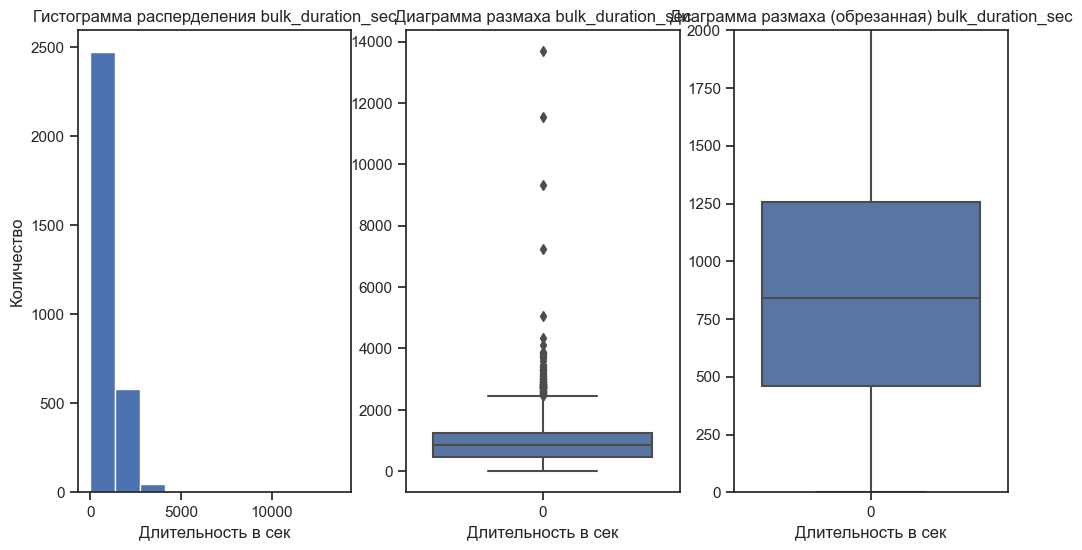

count     3104.000000
mean       916.415271
std        746.484682
min          0.000000
25%        461.000000
50%        842.000000
75%       1257.000000
max      13683.000000
Name: bulk_duration_sec, dtype: float64

'Число пропусков 25'

In [66]:
graph(data_bulk_time, 'bulk_duration_sec', 'Длительность в сек', 'Длительность в сек', True, [0,2000] )

Рассмотрим данные сплавов газа

In [67]:
data_gas = data_gas.rename(columns = {'Газ 1':'gas'})

In [68]:
data_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   gas     3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


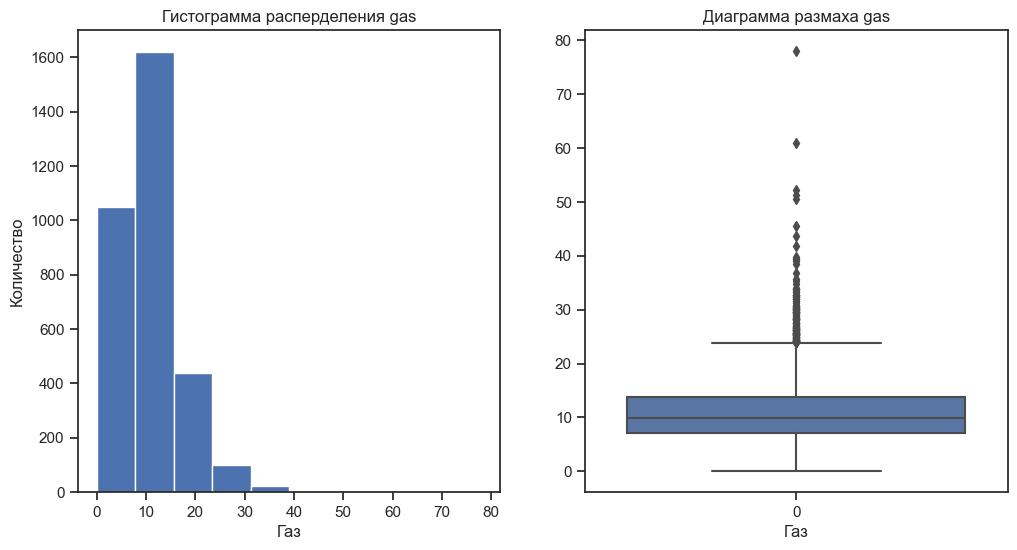

count    3239.000000
mean       11.002062
std         6.220327
min         0.008399
25%         7.043089
50%         9.836267
75%        13.769915
max        77.995040
Name: gas, dtype: float64

'Число пропусков 0'

In [69]:
graph(data_gas, 'gas', 'Газ', 'Газ' )

Рассмотрим данные измерения температуры

In [71]:
data_temp.head()

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


Откорректируем название столбцов

In [72]:
rename_columns_temp = {
    'Время замера': 'mesure_time',
    'Температура': 'temperature'}

In [73]:
data_temp = data_temp.rename(columns = rename_columns_temp)

Откорректируем тип времени в правильный формат 

In [74]:
col = 'mesure_time'
data_temp[col] = convert_from_ob_to_dtime(data_temp,col)

In [75]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   key          18092 non-null  int64         
 1   mesure_time  18092 non-null  datetime64[ns]
 2   temperature  14665 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 424.2 KB


Удалим пропуски!

In [76]:
data_temp = data_temp.dropna()

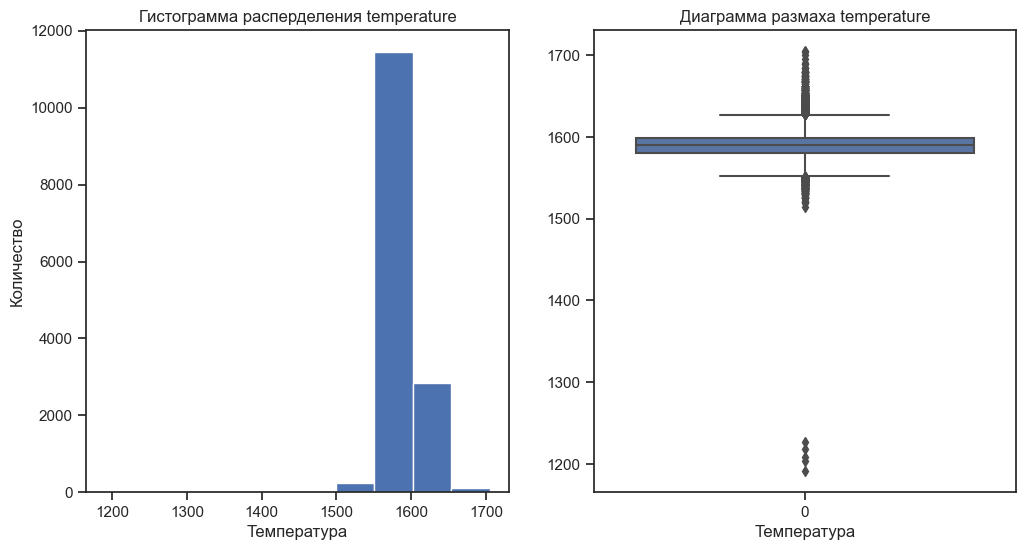

count    14665.000000
mean      1590.722741
std         20.394381
min       1191.000000
25%       1580.000000
50%       1590.000000
75%       1599.000000
max       1705.000000
Name: temperature, dtype: float64

'Число пропусков 0'

In [77]:
graph(data_temp, 'temperature', 'Температура', 'Температура' )

В данных есть выбросы. Удалим данные менее 1400 градусов

In [78]:
index_temp = data_temp[data_temp['temperature']<1400].index
len(index_temp)

5

In [79]:
data_temp = data_temp.drop(index_temp)

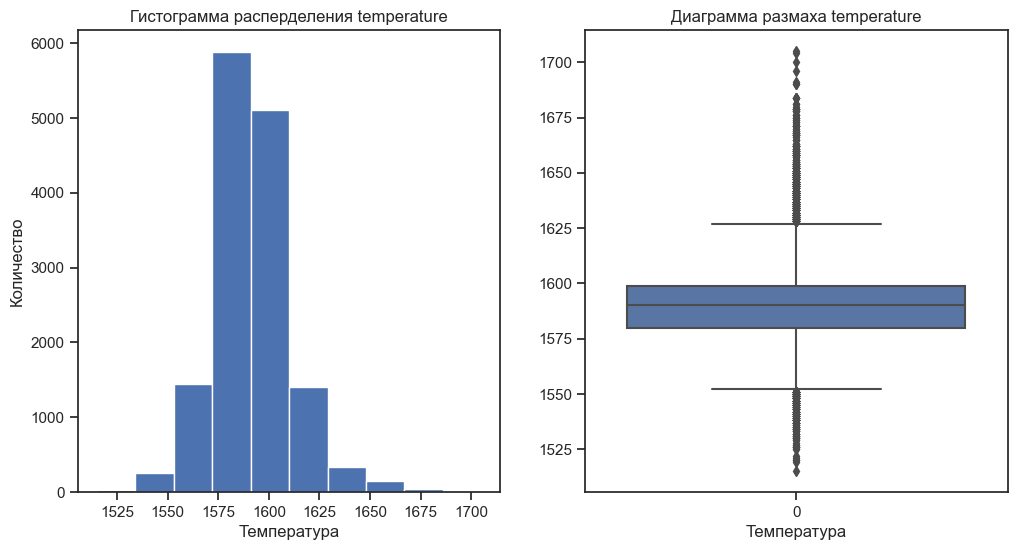

count    14660.000000
mean      1590.852729
std         19.143141
min       1515.000000
25%       1580.000000
50%       1590.000000
75%       1599.000000
max       1705.000000
Name: temperature, dtype: float64

'Число пропусков 0'

In [81]:
graph(data_temp, 'temperature', 'Температура', 'Температура' )

In [82]:
data_temp.duplicated().sum()

0

Рассмотрим данные проволочных материалов

In [83]:
data_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


Исправим название столбцов



In [84]:
data_wire.columns = data_wire.columns.str.replace(' ', '_')
data_wire.columns = data_wire.columns.str.lower()

Создадим новый признык. Седний объем подачи проволки

In [85]:
data_wire['wire_mean'] = data_wire[data_wire.columns[1:]].mean(axis=1)

In [86]:
data_wire.head()

,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9,wire_mean
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.059998
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.052315
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.160157
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.063515
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.176398


In [87]:
data_wire.duplicated().sum()

0

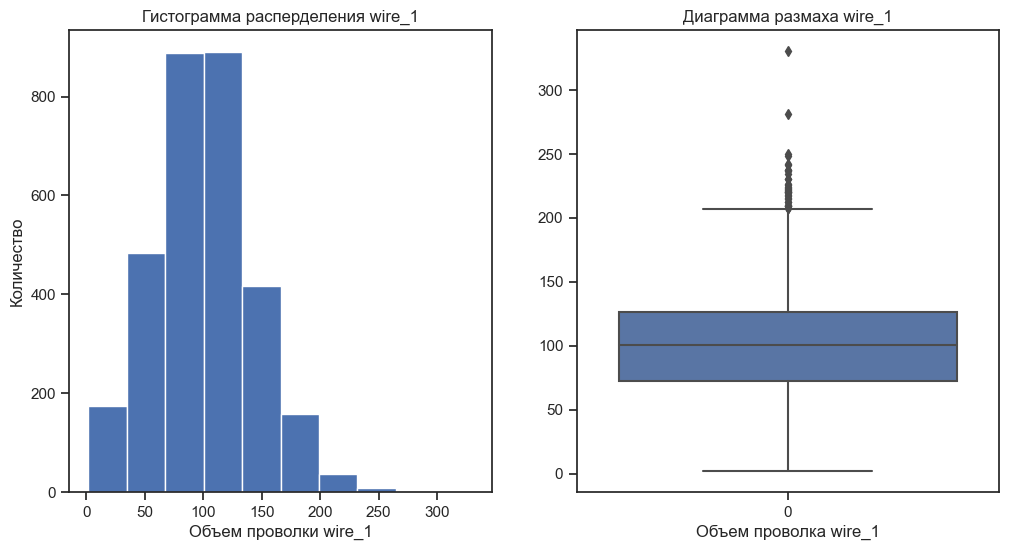

count    3055.000000
mean      100.895853
std        42.012518
min         1.918800
25%        72.115684
50%       100.158234
75%       126.060483
max       330.314424
Name: wire_1, dtype: float64

'Число пропусков 26'

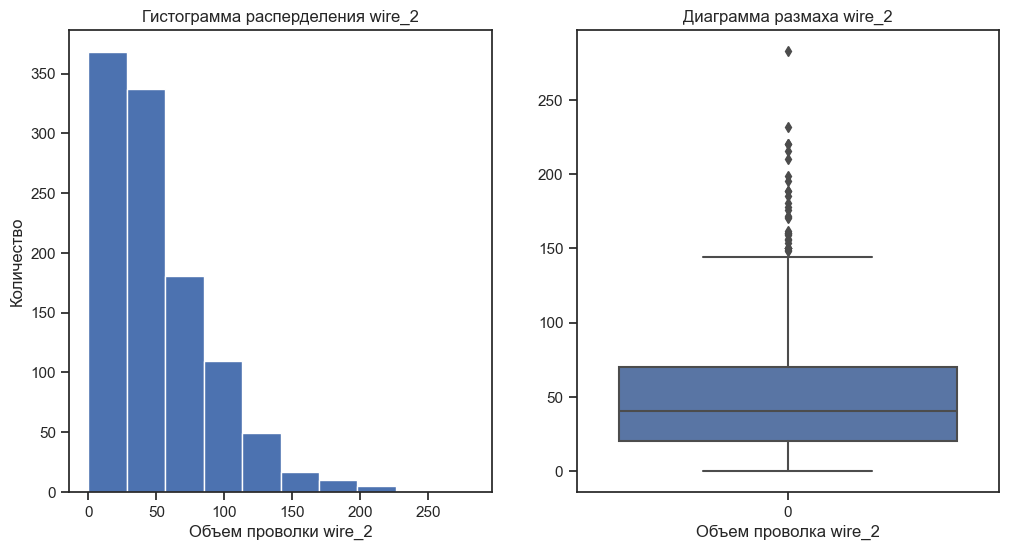

count    1079.000000
mean       50.577323
std        39.320216
min         0.030160
25%        20.193680
50%        40.142956
75%        70.227558
max       282.780152
Name: wire_2, dtype: float64

'Число пропусков 2002'

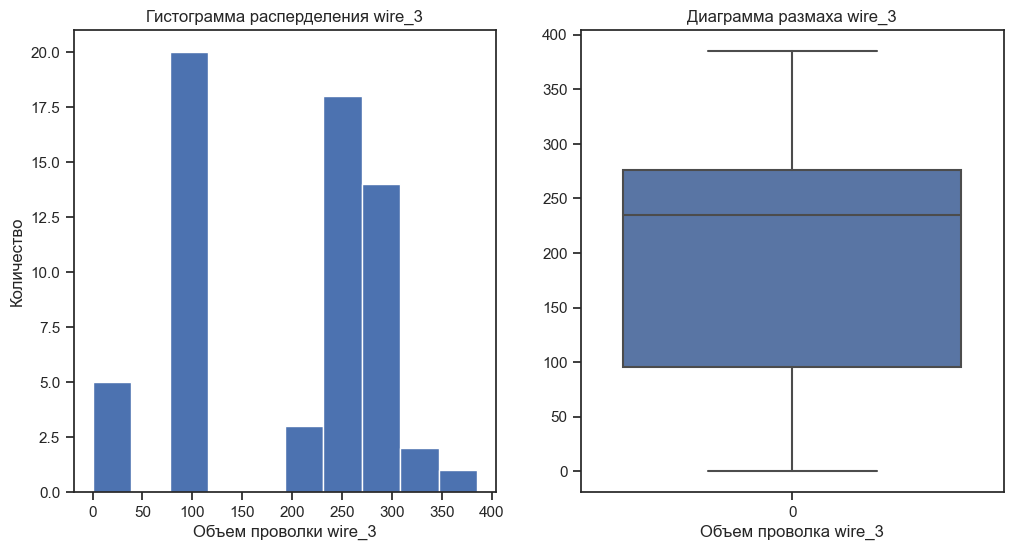

count     63.000000
mean     189.482681
std       99.513444
min        0.144144
25%       95.135044
50%      235.194977
75%      276.252014
max      385.008668
Name: wire_3, dtype: float64

'Число пропусков 3018'

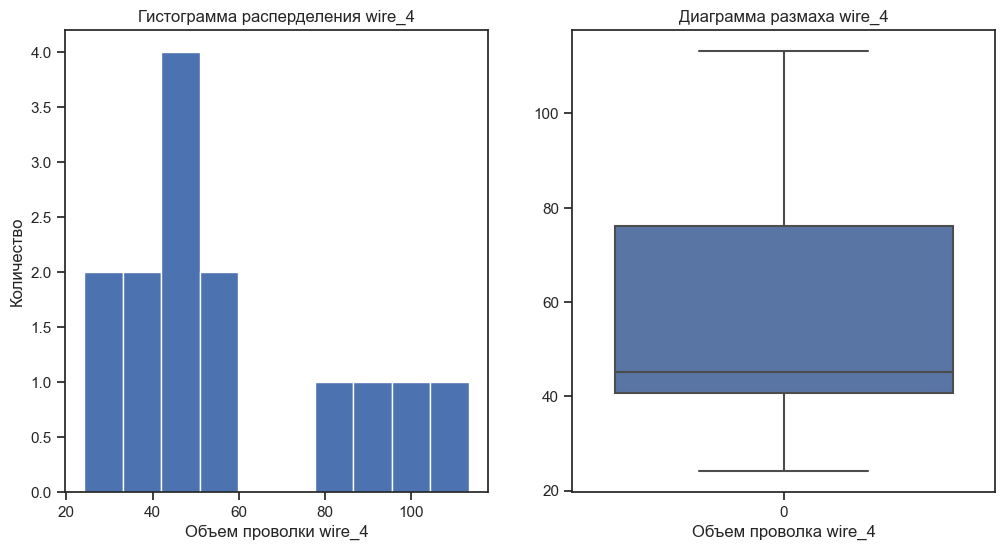

count     14.000000
mean      57.442841
std       28.824667
min       24.148801
25%       40.807002
50%       45.234282
75%       76.124619
max      113.231044
Name: wire_4, dtype: float64

'Число пропусков 3067'

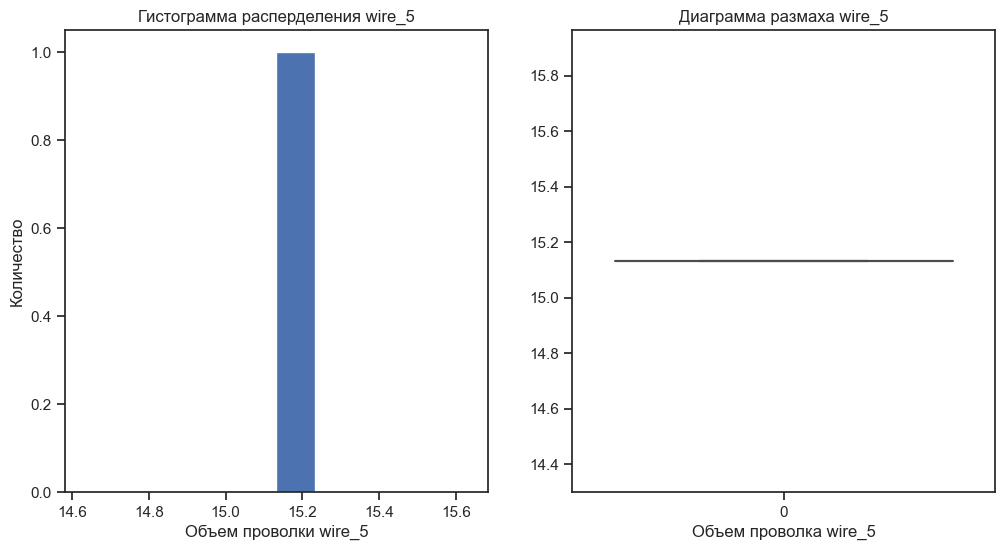

count     1.000
mean     15.132
std         NaN
min      15.132
25%      15.132
50%      15.132
75%      15.132
max      15.132
Name: wire_5, dtype: float64

'Число пропусков 3080'

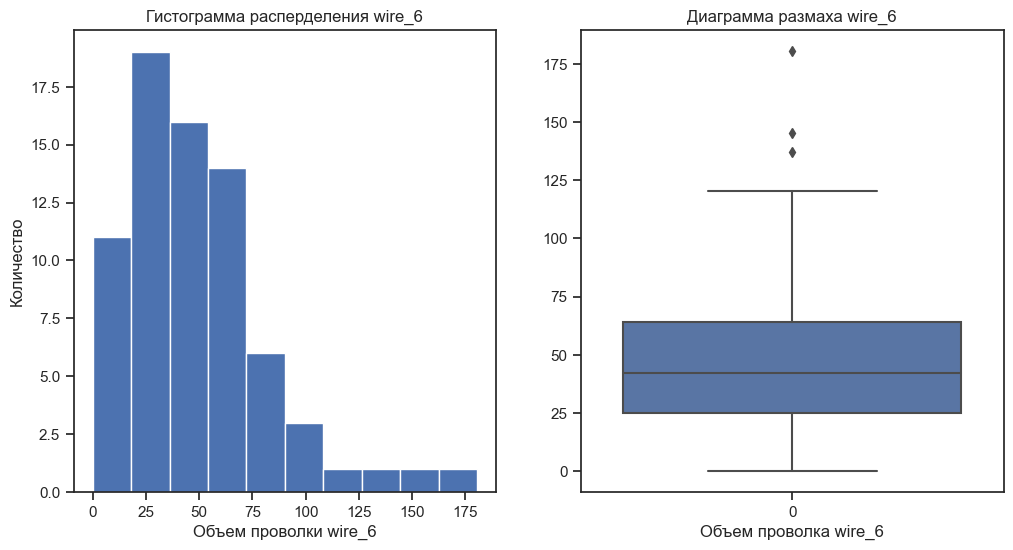

count     73.000000
mean      48.016974
std       33.919845
min        0.034320
25%       25.053600
50%       42.076324
75%       64.212723
max      180.454575
Name: wire_6, dtype: float64

'Число пропусков 3008'

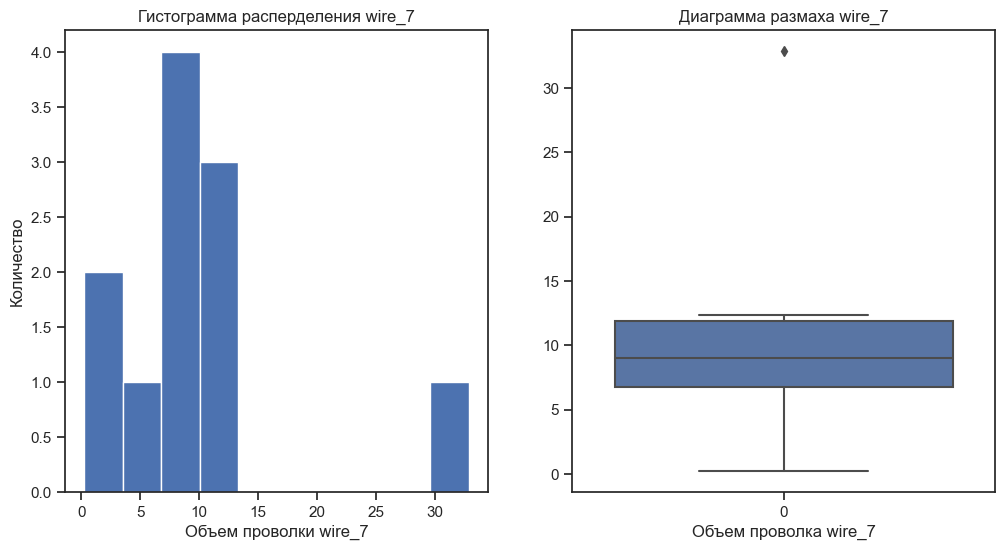

count    11.000000
mean     10.039007
std       8.610584
min       0.234208
25%       6.762756
50%       9.017009
75%      11.886057
max      32.847674
Name: wire_7, dtype: float64

'Число пропусков 3070'

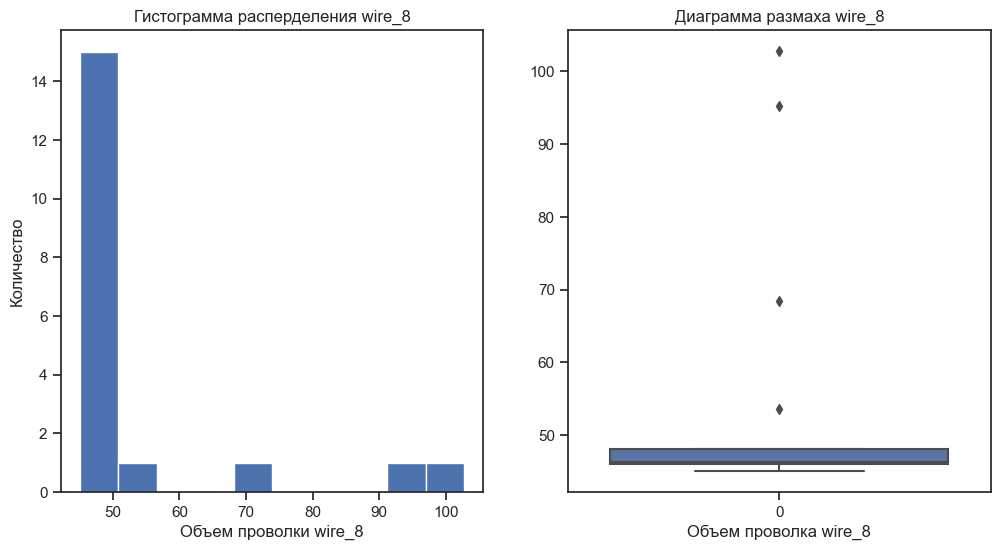

count     19.000000
mean      53.625193
std       16.881728
min       45.076721
25%       46.094879
50%       46.279999
75%       48.089603
max      102.762401
Name: wire_8, dtype: float64

'Число пропусков 3062'

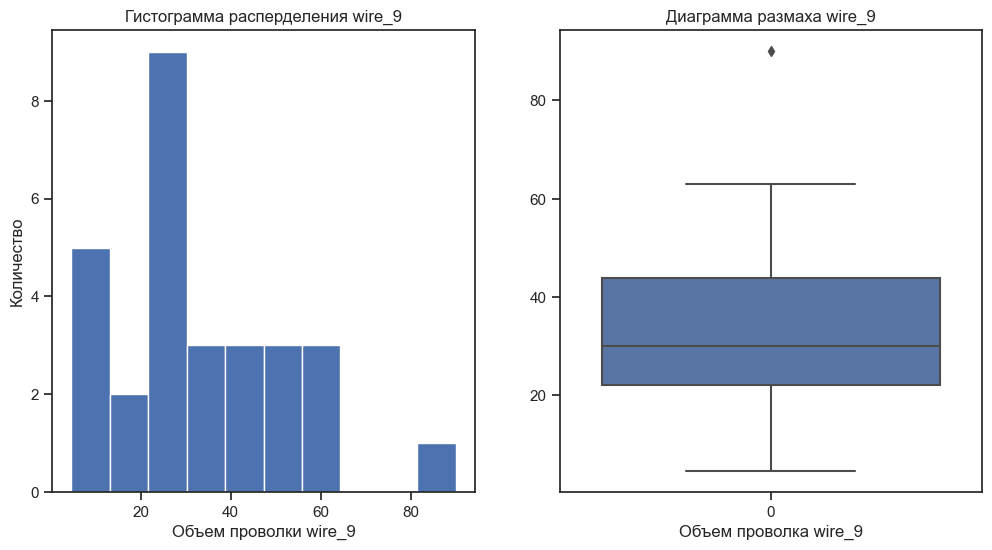

count    29.000000
mean     34.155752
std      19.931616
min       4.622800
25%      22.058401
50%      30.066399
75%      43.862003
max      90.053604
Name: wire_9, dtype: float64

'Число пропусков 3052'

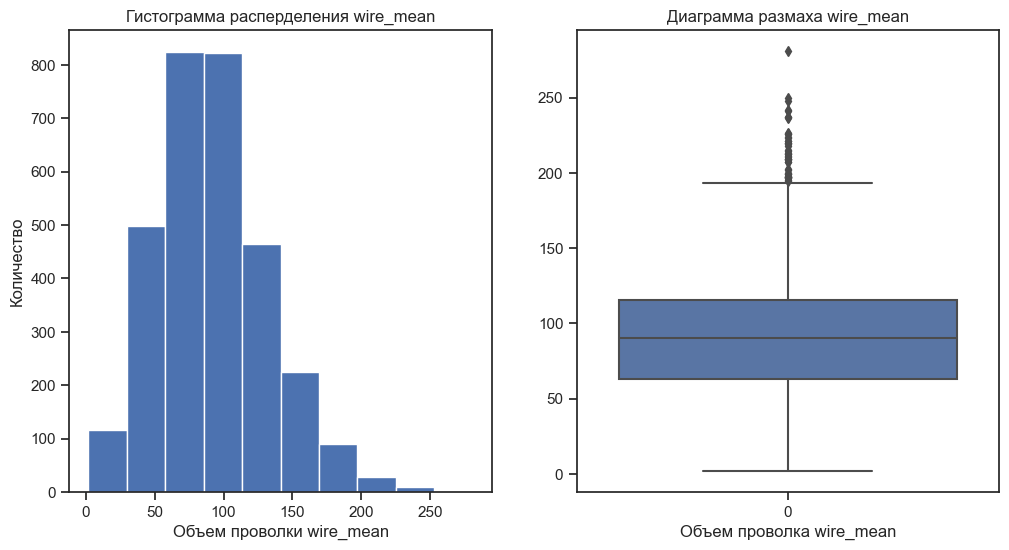

count    3081.000000
mean       92.277643
std        40.226395
min         1.918800
25%        63.169075
50%        90.068153
75%       115.315193
max       280.987214
Name: wire_mean, dtype: float64

'Число пропусков 0'

In [96]:
for i in data_wire.columns[1:]:
    graph(data_wire, i, 'Объем проволки '+i, 'Объем проволка '+i )

Рассмотрим данные время подачи проволочных материалов.

In [98]:
data_wire_time.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Исправим названия столбцов

In [99]:
data_wire_time.columns = data_wire_time.columns.str.replace(' ', '_')
data_wire_time.columns = data_wire_time.columns.str.lower()

In [100]:
data_wire_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   wire_1  3055 non-null   object
 2   wire_2  1079 non-null   object
 3   wire_3  63 non-null     object
 4   wire_4  14 non-null     object
 5   wire_5  1 non-null      object
 6   wire_6  73 non-null     object
 7   wire_7  11 non-null     object
 8   wire_8  19 non-null     object
 9   wire_9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


In [101]:
col = data_wire_time.columns[1:]
data_wire_time[col] = convert_from_ob_to_dtime(data_wire_time,col)


In [102]:
data_wire_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   key     3081 non-null   int64         
 1   wire_1  3055 non-null   datetime64[ns]
 2   wire_2  1079 non-null   datetime64[ns]
 3   wire_3  63 non-null     datetime64[ns]
 4   wire_4  14 non-null     datetime64[ns]
 5   wire_5  1 non-null      datetime64[ns]
 6   wire_6  73 non-null     datetime64[ns]
 7   wire_7  11 non-null     datetime64[ns]
 8   wire_8  19 non-null     datetime64[ns]
 9   wire_9  29 non-null     datetime64[ns]
dtypes: datetime64[ns](9), int64(1)
memory usage: 240.8 KB


Добавим новый призныки

In [103]:
data_wire_time['wire_time_max'] = data_wire_time[data_wire_time.columns[1:]].max(axis=1)
data_wire_time['wire_time_min'] = data_wire_time[data_wire_time.columns[1:]].min(axis=1)

In [104]:
data_wire_time['wire_duration_sec'] = (data_wire_time['wire_time_max'] - 
                                  data_wire_time['wire_time_min']).apply(lambda x: x.total_seconds())

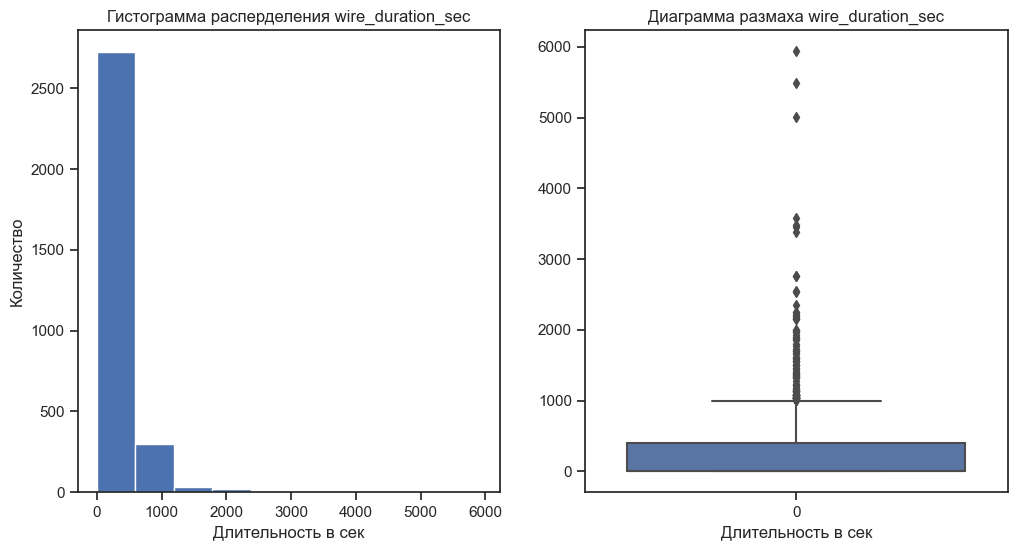

count    3081.000000
mean      214.519312
std       396.131967
min         0.000000
25%         0.000000
50%         0.000000
75%       401.000000
max      5937.000000
Name: wire_duration_sec, dtype: float64

'Число пропусков 0'

In [108]:
graph(data_wire_time, 'wire_duration_sec', 'Длительность в сек', 'Длительность в сек' )

In [106]:
data_wire_time.duplicated().sum()

0

Общий результат по Предобработке и анализу.

В таблице об электродах

В датфрейме data_arc исправили названия столбцов. Посчитали разницу времени начало и конца. По формуле добавили полную мошьность . Тем самым добавили новый признык. Удалили не нужные столбцы. Явных дубликатов не обнаружено. Во всех сталбцах имеются выбросы. В реактивных имелось не правельное значение . Было удалено В времени удалили значение более 400 секунд. Так как их количество было не большм примерно 400 штук.

В таблице сыпучих материалов.

Откорректировали названия столбцов. Удалили столбцы с большим числом пропусков. Во всех данных имеются выбросы в той или ной степени Из столбцов bulk 6, 14, 12 ,15 были удаленны не многочисленные но очень большие выбросы. Данные распределены не нормальным оброзом.

В таблице сыпучих материалов (время).

Исправили название столбцов. Удалили столбцы с большим числом пропусков и добавили новыей призныки максимаьного и минимального времени добовления материала и длительность по времени когда добовляли .

В таблице газ

Исправили название столбцов. Удалил не приемлемые выбросы

В таблице температуры

Поправили названия столбцов удалили все пропуски. Избавились от больших выбросов

В таблице проволочных материалов

Исправили названия столбцов Добавили новый признык

В таблице проволочных материалов (Время)

Исправили названия столбцов. Создали новые призныки

 Объединение данных
 ---

В данной главе мы приведем все наши многочисленные таблицы к одной единой таблице. Но перед этим из уде имеющихся данных отберем на иболее важные призныки (по моему мнению)

сделаем ресет всех индексах во всех наших таблица.

In [111]:
data_arc.reset_index(drop=True, inplace=True)
data_bulk.reset_index(drop=True, inplace=True)
data_bulk_time.reset_index(drop=True, inplace=True)
data_gas.reset_index(drop=True, inplace=True)
data_temp.reset_index(drop=True, inplace=True)
data_wire.reset_index(drop=True, inplace=True)
data_wire_time.reset_index(drop=True, inplace=True)

In [112]:
data_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   key        3129 non-null   int64  
 1   bulk_3     1298 non-null   float64
 2   bulk_4     1014 non-null   float64
 3   bulk_6     576 non-null    float64
 4   bulk_12    2450 non-null   float64
 5   bulk_14    2806 non-null   float64
 6   bulk_15    2248 non-null   float64
 7   bulk_mean  3104 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 195.7 KB


оставим наиболее значемые призныки.

In [114]:
data_arc_only = data_arc[['key','active', 'reactive','time_sec', 'total_power']]
data_bulk_only = data_bulk[['key','bulk_3','bulk_4','bulk_12','bulk_14','bulk_15','bulk_mean']]
data_bulk_time_only = data_bulk_time[['key', 'bulk_duration_sec']]
data_wire_only = data_wire[['key','wire_mean']]
data_wire_time_only = data_wire_time[['key','wire_duration_sec']]

Удалим партии в которых то был праизведен лишь один замер температуры

In [118]:
alone_keys = pd.pivot_table(data_temp, index='key', values='mesure_time', aggfunc='count').query('mesure_time<2').index
len(alone_keys)

740

In [119]:
data_temp = data_temp.drop(data_temp.loc[data_temp['key'].isin(alone_keys)].index, axis=0)


Создание сводных таблиц

Если рассмотреть наши данные то видно что некоторые key встречаются много раз а не которые один раз. Давайте сведем все в общю таблицу. Для того что бы более правильно структурировать наш данные.

Начнем с data_temp так как это наш целевой признок. Мы найдем среднию температуру для каждого сплава и число измерений температуры

In [120]:
data_temp_pivot = pd.pivot_table(data_temp, index='key', values=['temperature'], 
                                 aggfunc={'temperature':['first', 'last']})

data_temp_pivot.columns = ['first_temperature', 'temperature'] 
data_temp_pivot.head()

,first_temperature,temperature
key,,
1,1571.0,1613.0
2,1581.0,1602.0
3,1596.0,1599.0
4,1601.0,1625.0
5,1576.0,1602.0


In [121]:
data_temp_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2475 entries, 1 to 2499
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   first_temperature  2475 non-null   float64
 1   temperature        2475 non-null   float64
dtypes: float64(2)
memory usage: 58.0 KB


Сгупируем наши данные об электродах по кей. Будем брать опять среднию для каждого.

In [122]:
data_arc_pivot = pd.pivot_table(data_arc_only, index='key', values=['active','reactive','time_sec','total_power'],
                               aggfunc=['mean'])
data_arc_pivot.columns = ['active','reactive','time_sec_arc','total_power']
data_arc_pivot.head()

,active,reactive,time_sec_arc,total_power
key,,,,
1,0.607346,0.428564,219.60,0.743747
2,0.534852,0.363339,202.75,0.647087
3,0.812728,0.587491,131.00,1.003845
4,0.676622,0.514248,185.25,0.850010
5,0.563238,0.421998,217.25,0.704245


In [123]:
data_arc_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3214 entries, 1 to 3241
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   active        3214 non-null   float64
 1   reactive      3214 non-null   float64
 2   time_sec_arc  3214 non-null   float64
 3   total_power   3214 non-null   float64
dtypes: float64(4)
memory usage: 125.5 KB


In [124]:
data_bulk_pivot = pd.pivot_table(data_bulk_only, index='key', 
                                 
                                 values=['bulk_3','bulk_4','bulk_12','bulk_14','bulk_15','bulk_mean'],

                                 aggfunc=['mean'])

data_bulk_pivot.columns = ['bulk_3','bulk_4','bulk_12','bulk_14','bulk_15','bulk_mean']


data_bulk_pivot.head(2)

,bulk_3,bulk_4,bulk_12,bulk_14,bulk_15,bulk_mean
key,,,,,,
1,206.0,150.0,154.0,NaN,43.0,138.25
2,206.0,149.0,154.0,NaN,73.0,145.50


Заполним пропуски

In [125]:
data_bulk_pivot = data_bulk_pivot.fillna(0)

In [126]:
data_bulk_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3104 entries, 1 to 3241
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bulk_3     3104 non-null   float64
 1   bulk_4     3104 non-null   float64
 2   bulk_12    3104 non-null   float64
 3   bulk_14    3104 non-null   float64
 4   bulk_15    3104 non-null   float64
 5   bulk_mean  3104 non-null   float64
dtypes: float64(6)
memory usage: 169.8 KB


In [127]:
data_bulk_time_pivot = pd.pivot_table(data_bulk_time_only, index='key', values=['bulk_duration_sec'],
                               aggfunc=['mean'])
data_bulk_time_pivot.columns = ['bulk_duration_sec']
data_bulk_time_pivot.head(2)

,bulk_duration_sec
key,
1,1085.0
2,1000.0


In [128]:
data_bulk_time_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3104 entries, 1 to 3241
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bulk_duration_sec  3104 non-null   float64
dtypes: float64(1)
memory usage: 48.5 KB


In [129]:
data_gas_pivot = pd.pivot_table(data_gas, index='key', values=['gas'],
                               aggfunc=['mean'])
data_gas_pivot.columns = ['gas']
data_gas_pivot.head(2)

,gas
key,
1,29.749986
2,12.555561


In [130]:
data_gas_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3239 entries, 1 to 3241
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gas     3239 non-null   float64
dtypes: float64(1)
memory usage: 50.6 KB


In [131]:
data_wire_time_pivot = pd.pivot_table(data_wire_time_only, index='key', values=['wire_duration_sec'],
                               aggfunc=['mean'])
data_wire_time_pivot.columns = ['wire_duration_sec']
data_wire_time_pivot.head(2)

,wire_duration_sec
key,
1,0.0
2,0.0


In [132]:
data_wire_time_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3081 entries, 1 to 3241
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   wire_duration_sec  3081 non-null   float64
dtypes: float64(1)
memory usage: 48.1 KB


In [133]:
data_wire_pivot = pd.pivot_table(data_wire_only, index='key', values=['wire_mean'],
                               aggfunc=['mean'])
data_wire_pivot.columns = ['wire_mean']
data_wire_pivot.head(2)

,wire_mean
key,
1,60.059998
2,96.052315


In [134]:
data_wire_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3081 entries, 1 to 3241
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   wire_mean  3081 non-null   float64
dtypes: float64(1)
memory usage: 48.1 KB


 Объеденение сводных таблиц

In [135]:
left_merged_df = pd.merge(data_temp_pivot, data_arc_pivot, left_index=True, right_index=True, how='inner')


In [136]:
left_merged_df = pd.merge(left_merged_df, data_bulk_pivot, left_index=True, right_index=True, how='inner')

In [137]:
left_merged_df = pd.merge(left_merged_df, data_bulk_time_pivot, left_index=True, right_index=True, how='inner')

In [138]:
left_merged_df = pd.merge(left_merged_df, data_gas_pivot, left_index=True, right_index=True, how='inner')

In [139]:
left_merged_df = pd.merge(left_merged_df, data_wire_pivot, left_index=True, right_index=True, how='inner')

In [140]:
left_merged_df = pd.merge(left_merged_df, data_wire_time_pivot, left_index=True, right_index=True, how='inner')

In [141]:
left_merged_df.head()

,first_temperature,temperature,active,reactive,time_sec_arc,total_power,bulk_3,bulk_4,bulk_12,bulk_14,bulk_15,bulk_mean,bulk_duration_sec,gas,wire_mean,wire_duration_sec
key,,,,,,,,,,,,,,,,
1,1571.0,1613.0,0.607346,0.428564,219.60,0.743747,206.0,150.0,154.0,0.0,43.0,138.25,1085.0,29.749986,60.059998,0.0
2,1581.0,1602.0,0.534852,0.363339,202.75,0.647087,206.0,149.0,154.0,0.0,73.0,145.50,1000.0,12.555561,96.052315,0.0
3,1596.0,1599.0,0.812728,0.587491,131.00,1.003845,205.0,152.0,153.0,0.0,34.0,136.00,983.0,28.554793,91.160157,0.0
4,1601.0,1625.0,0.676622,0.514248,185.25,0.850010,207.0,153.0,154.0,0.0,81.0,148.75,878.0,18.841219,89.063515,0.0
5,1576.0,1602.0,0.563238,0.421998,217.25,0.704245,203.0,151.0,152.0,0.0,78.0,146.00,205.0,5.413692,49.176398,310.0


In [142]:
left_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2312 entries, 1 to 2499
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   first_temperature  2312 non-null   float64
 1   temperature        2312 non-null   float64
 2   active             2312 non-null   float64
 3   reactive           2312 non-null   float64
 4   time_sec_arc       2312 non-null   float64
 5   total_power        2312 non-null   float64
 6   bulk_3             2312 non-null   float64
 7   bulk_4             2312 non-null   float64
 8   bulk_12            2312 non-null   float64
 9   bulk_14            2312 non-null   float64
 10  bulk_15            2312 non-null   float64
 11  bulk_mean          2312 non-null   float64
 12  bulk_duration_sec  2312 non-null   float64
 13  gas                2312 non-null   float64
 14  wire_mean          2312 non-null   float64
 15  wire_duration_sec  2312 non-null   float64
dtypes: float64(16)
memory usage: 

Исследовательский анализ и предобработка данных объединённого датафрейма

In [143]:
data = left_merged_df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2312 entries, 1 to 2499
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   first_temperature  2312 non-null   float64
 1   temperature        2312 non-null   float64
 2   active             2312 non-null   float64
 3   reactive           2312 non-null   float64
 4   time_sec_arc       2312 non-null   float64
 5   total_power        2312 non-null   float64
 6   bulk_3             2312 non-null   float64
 7   bulk_4             2312 non-null   float64
 8   bulk_12            2312 non-null   float64
 9   bulk_14            2312 non-null   float64
 10  bulk_15            2312 non-null   float64
 11  bulk_mean          2312 non-null   float64
 12  bulk_duration_sec  2312 non-null   float64
 13  gas                2312 non-null   float64
 14  wire_mean          2312 non-null   float64
 15  wire_duration_sec  2312 non-null   float64
dtypes: float64(16)
memory usage: 

Создадим новы признык. разницы между активной и реактивной мощьностью 

In [145]:
data['power_diff'] = abs(data['active']-data['reactive'])

Создадим признык работы 

In [147]:
data['work'] = data['time_sec_arc'] * data['total_power']

In [148]:
data.head()

,first_temperature,temperature,active,reactive,time_sec_arc,total_power,bulk_3,bulk_4,bulk_12,bulk_14,bulk_15,bulk_mean,bulk_duration_sec,gas,wire_mean,wire_duration_sec,power_diff,work
key,,,,,,,,,,,,,,,,,,
1,1571.0,1613.0,0.607346,0.428564,219.60,0.743747,206.0,150.0,154.0,0.0,43.0,138.25,1085.0,29.749986,60.059998,0.0,0.178782,163.326877
2,1581.0,1602.0,0.534852,0.363339,202.75,0.647087,206.0,149.0,154.0,0.0,73.0,145.50,1000.0,12.555561,96.052315,0.0,0.171513,131.196925
3,1596.0,1599.0,0.812728,0.587491,131.00,1.003845,205.0,152.0,153.0,0.0,34.0,136.00,983.0,28.554793,91.160157,0.0,0.225237,131.503655
4,1601.0,1625.0,0.676622,0.514248,185.25,0.850010,207.0,153.0,154.0,0.0,81.0,148.75,878.0,18.841219,89.063515,0.0,0.162374,157.464261
5,1576.0,1602.0,0.563238,0.421998,217.25,0.704245,203.0,151.0,152.0,0.0,78.0,146.00,205.0,5.413692,49.176398,310.0,0.141240,152.997208


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2312 entries, 1 to 2499
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   first_temperature  2312 non-null   float64
 1   temperature        2312 non-null   float64
 2   active             2312 non-null   float64
 3   reactive           2312 non-null   float64
 4   time_sec_arc       2312 non-null   float64
 5   total_power        2312 non-null   float64
 6   bulk_3             2312 non-null   float64
 7   bulk_4             2312 non-null   float64
 8   bulk_12            2312 non-null   float64
 9   bulk_14            2312 non-null   float64
 10  bulk_15            2312 non-null   float64
 11  bulk_mean          2312 non-null   float64
 12  bulk_duration_sec  2312 non-null   float64
 13  gas                2312 non-null   float64
 14  wire_mean          2312 non-null   float64
 15  wire_duration_sec  2312 non-null   float64
 16  power_diff         2312 non-n

wire_duration_sec , duration_sec надо перевести в инт

In [150]:
cols = ['wire_duration_sec' , 'bulk_duration_sec']
data[cols] = data[cols].astype(int)

In [151]:
data.head(2)

,first_temperature,temperature,active,reactive,time_sec_arc,total_power,bulk_3,bulk_4,bulk_12,bulk_14,bulk_15,bulk_mean,bulk_duration_sec,gas,wire_mean,wire_duration_sec,power_diff,work
key,,,,,,,,,,,,,,,,,,
1,1571.0,1613.0,0.607346,0.428564,219.60,0.743747,206.0,150.0,154.0,0.0,43.0,138.25,1085,29.749986,60.059998,0,0.178782,163.326877
2,1581.0,1602.0,0.534852,0.363339,202.75,0.647087,206.0,149.0,154.0,0.0,73.0,145.50,1000,12.555561,96.052315,0,0.171513,131.196925


In [152]:
data.duplicated().sum()

0

In [155]:
def histograms(data):
    for i in data.columns:
        fig, [ax1, ax2] = plt.subplots(ncols=2, figsize = (12,6))
        ax1.title.set_text('Гистограмма распределения '+i)
        ax1.hist(data[i])
        ax1.set_xlabel(i)
        ax1.set_ylabel('Количество')
        
        
        ax2.title.set_text('Диаграмма размаха '+ i)
        #ax1.hist(data[i])
        ax2.set_xlabel(i)
        ax2.boxplot(data[i])
        
        plt.show()

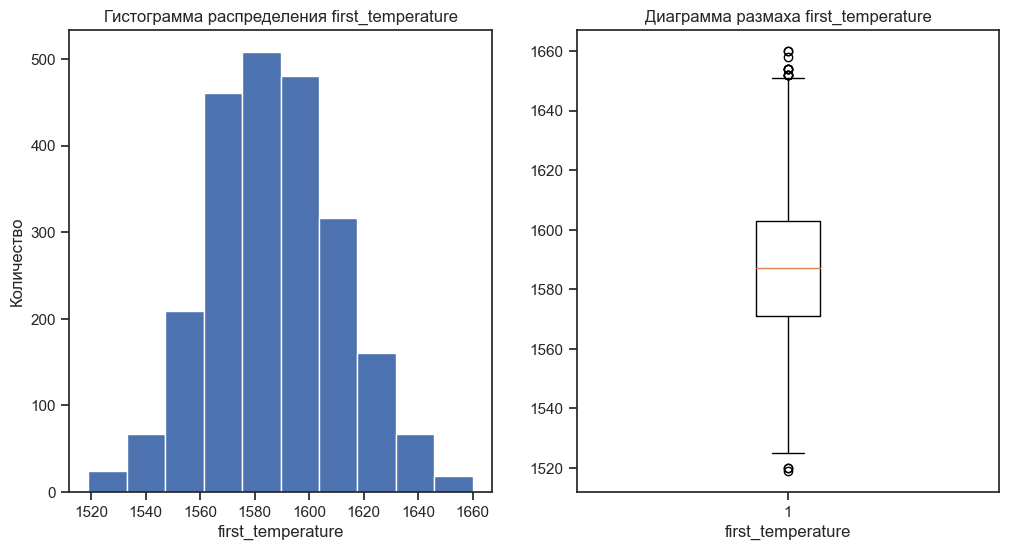

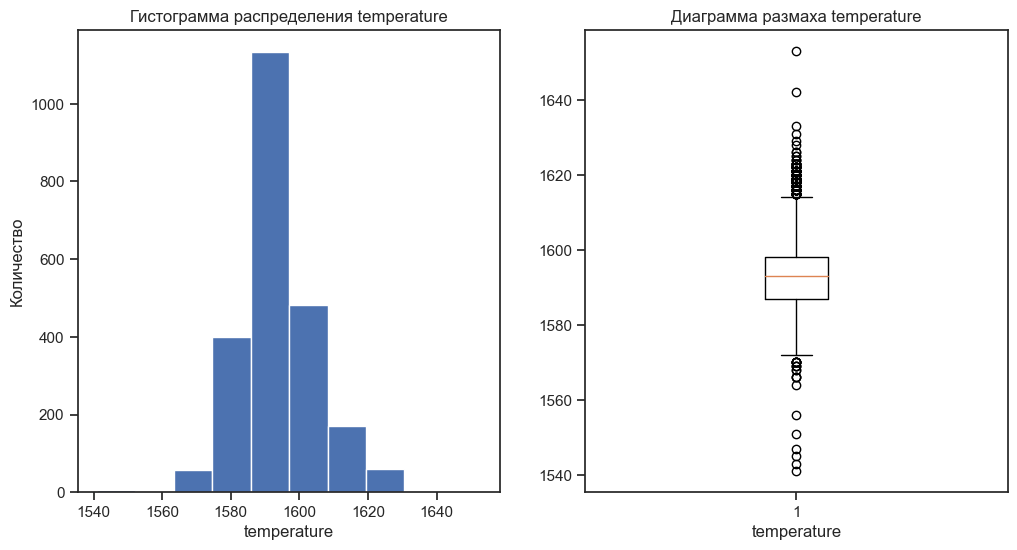

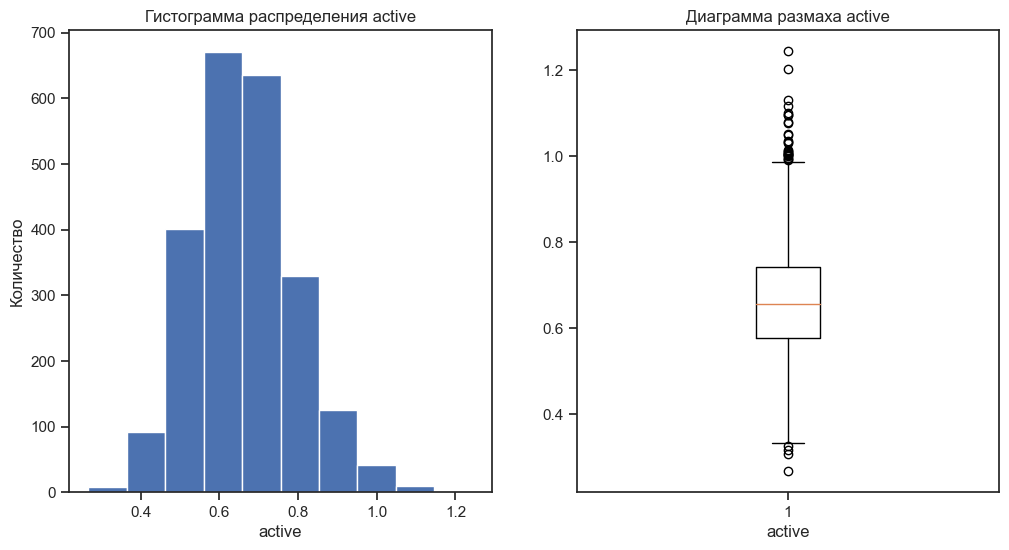

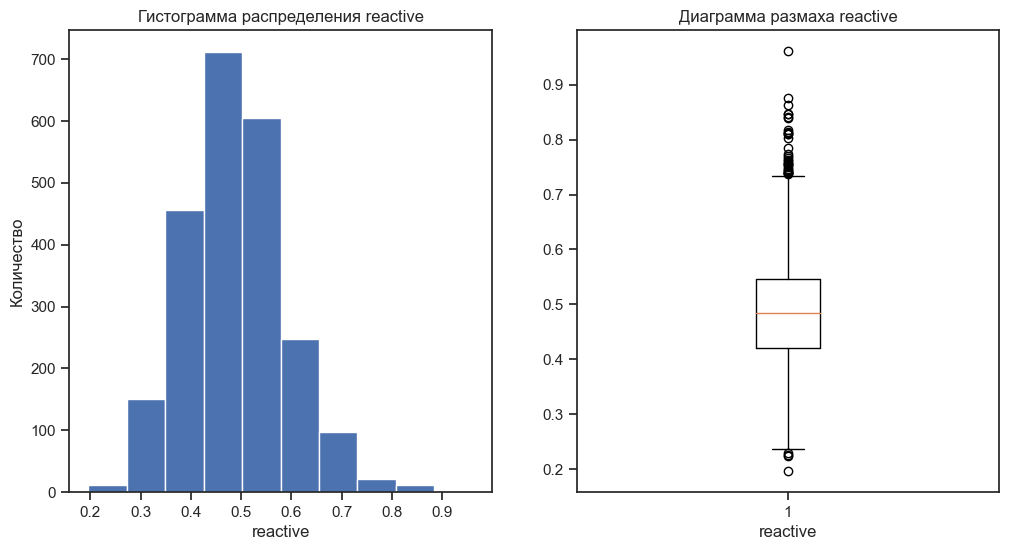

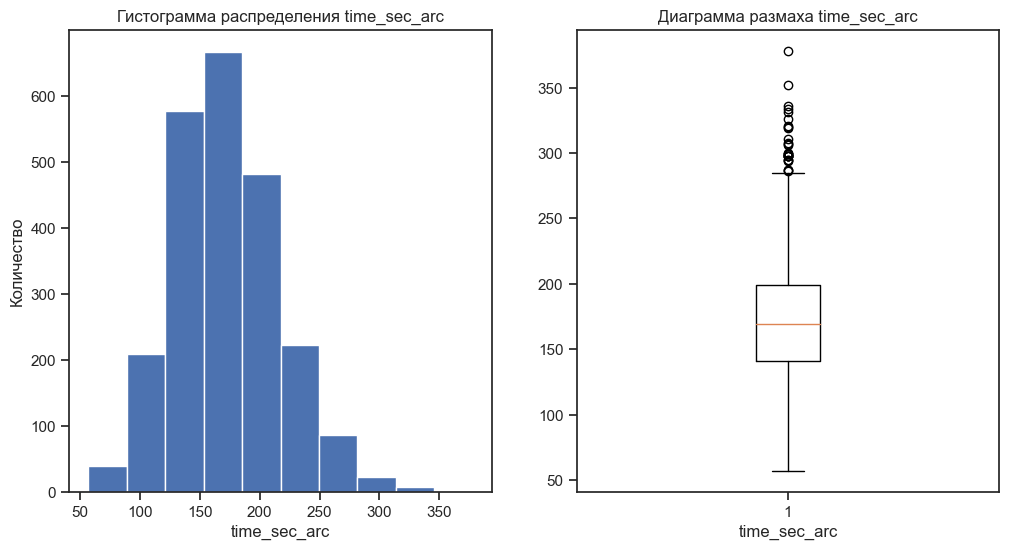

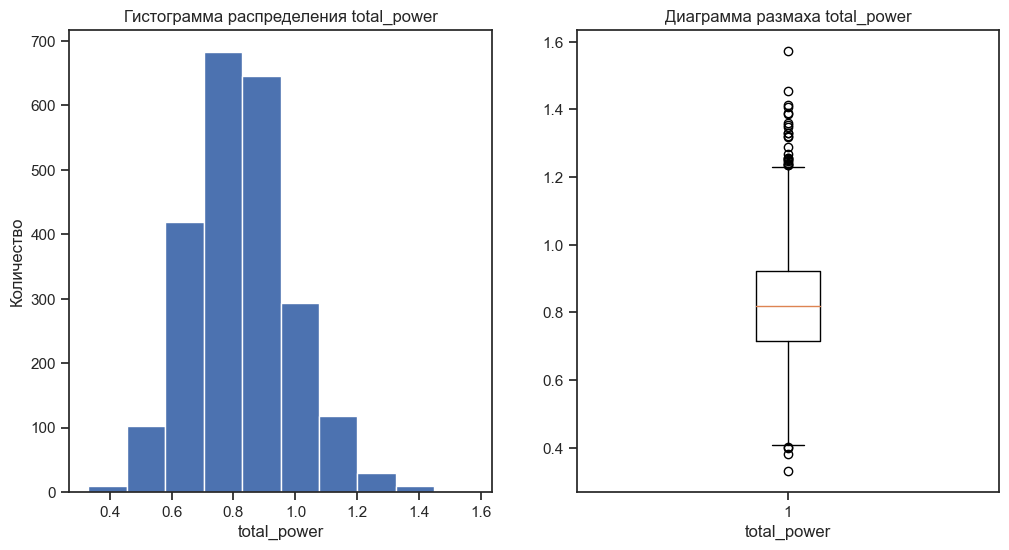

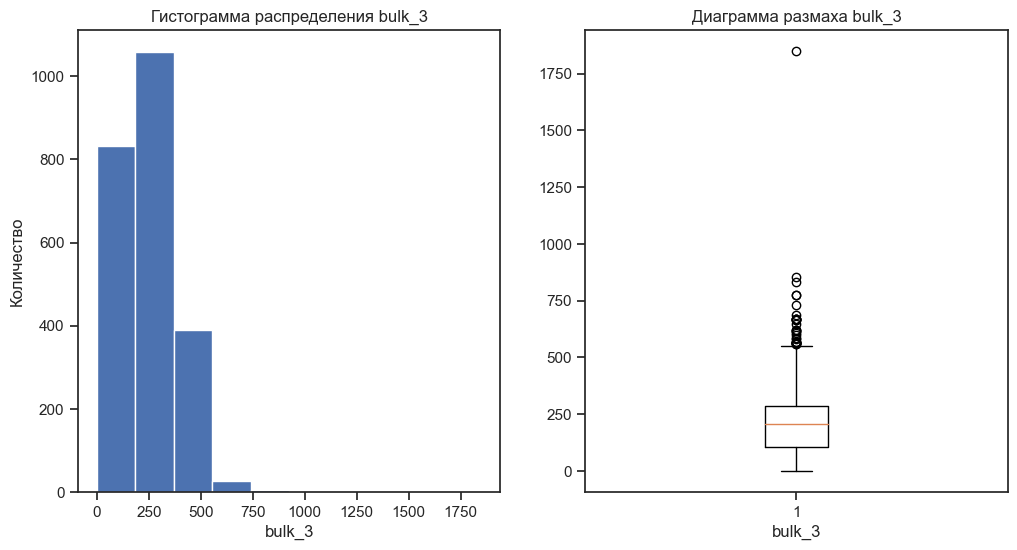

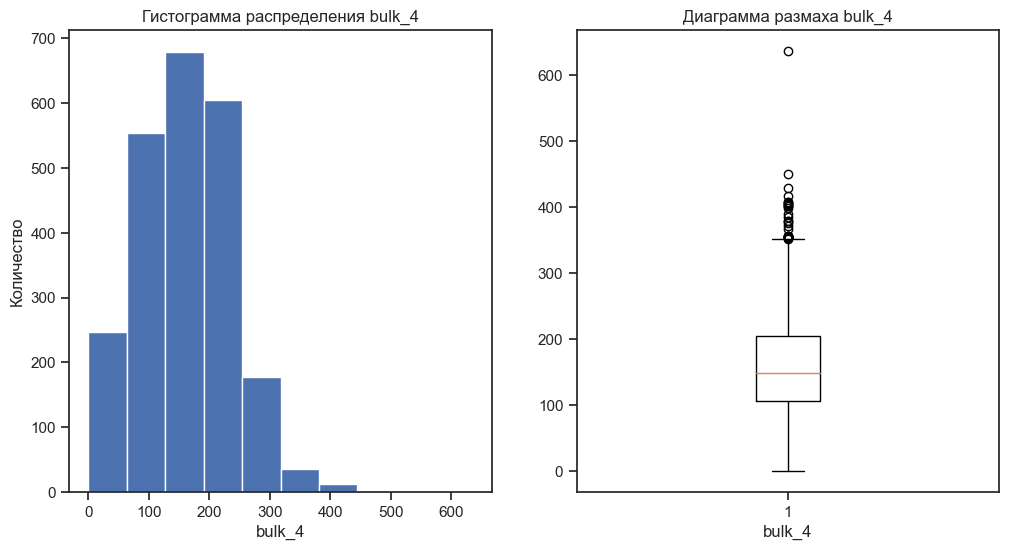

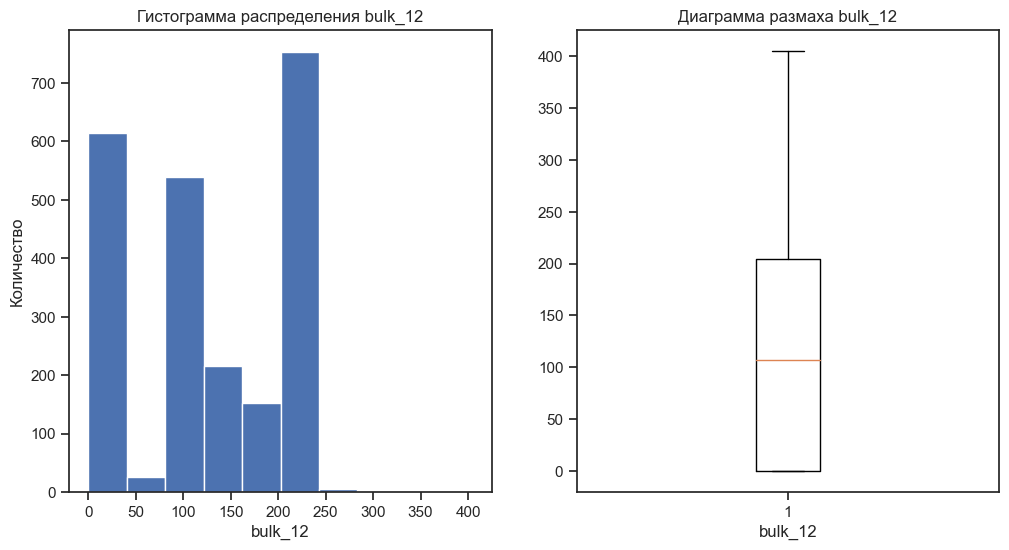

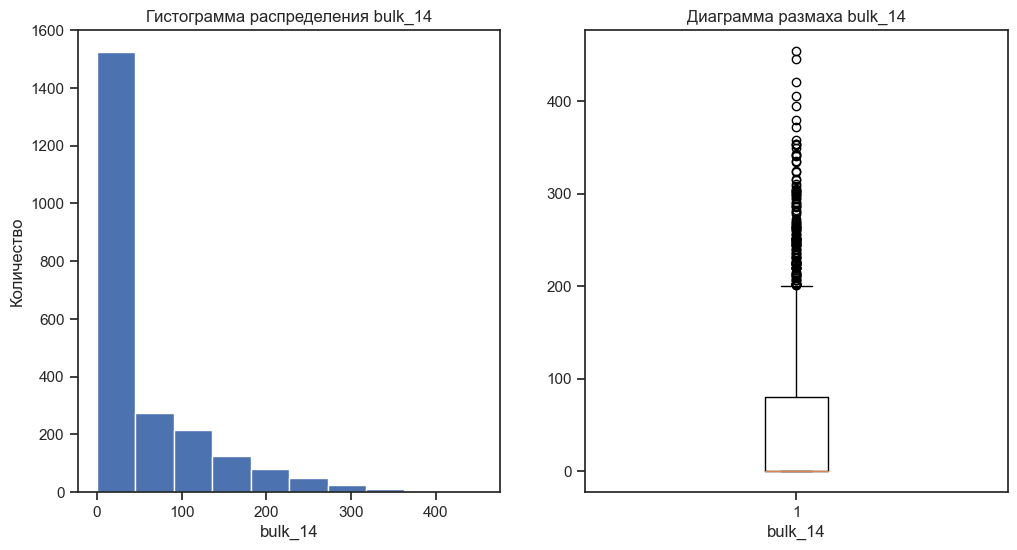

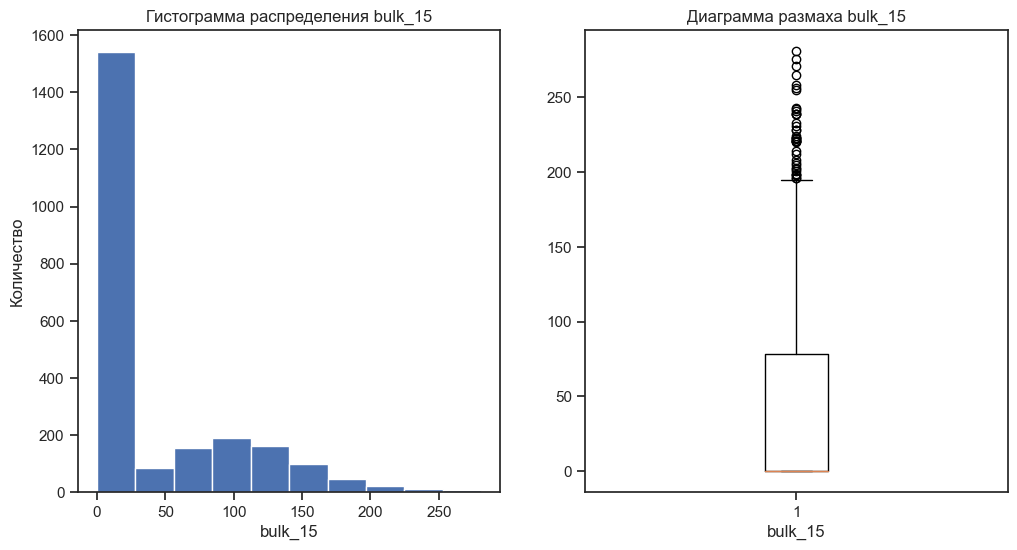

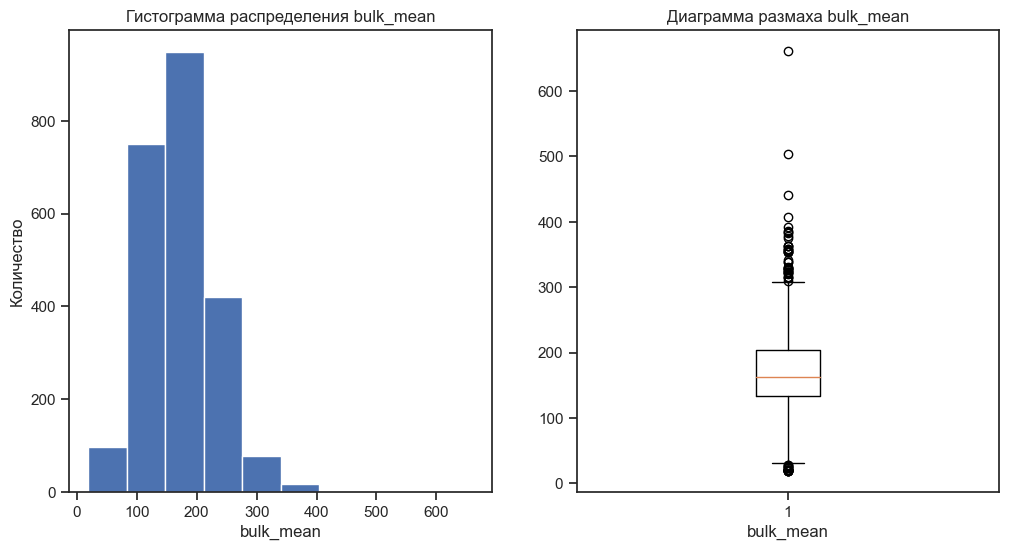

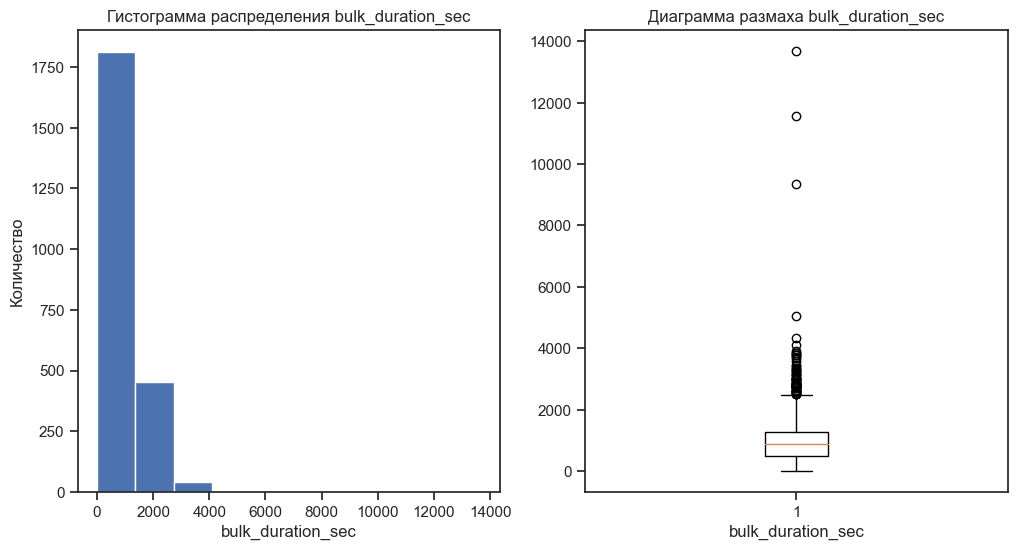

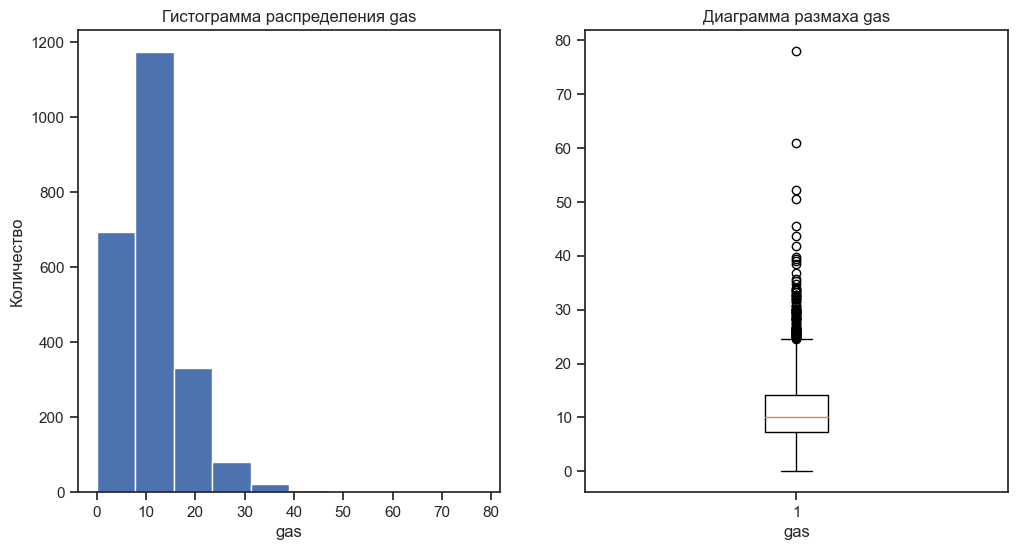

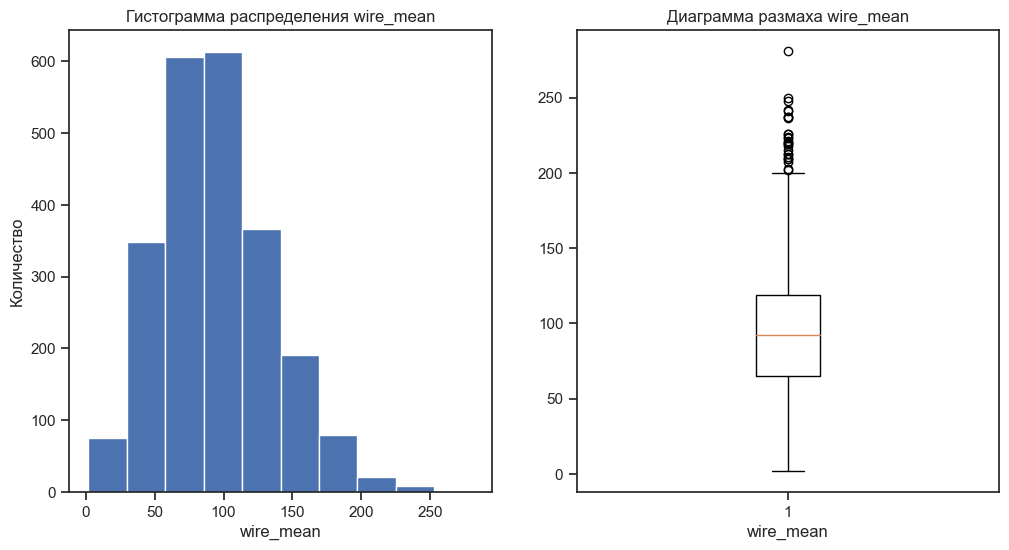

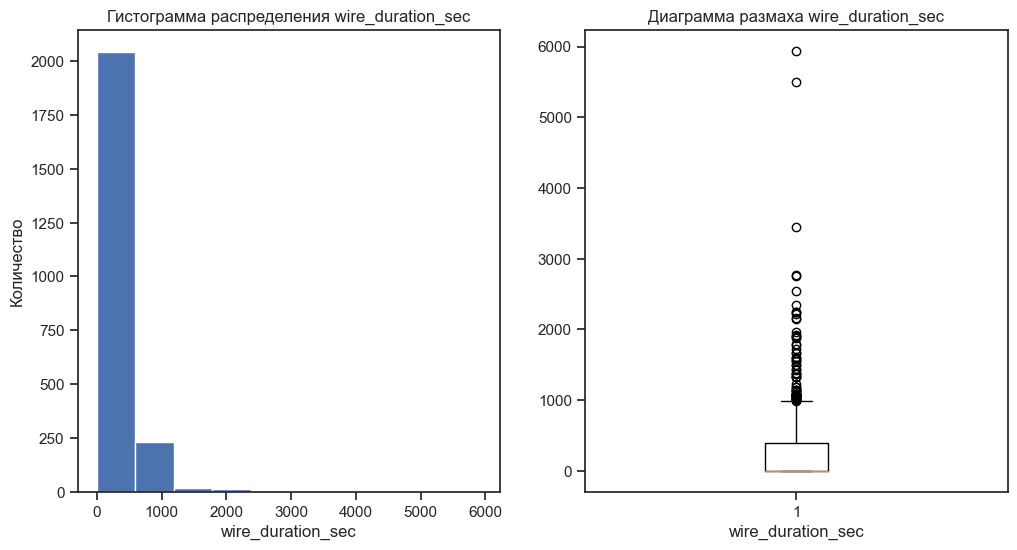

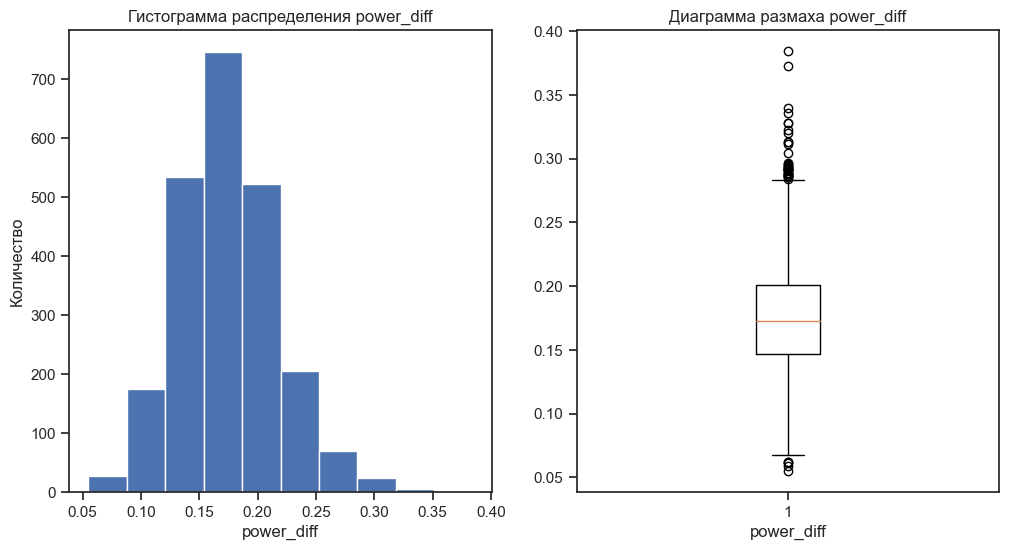

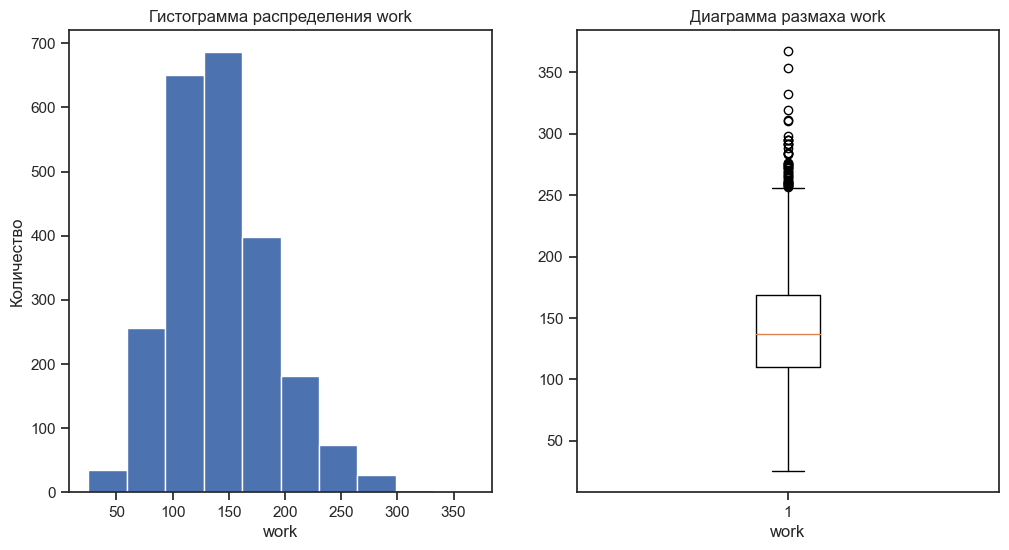

In [156]:
histograms(data)

Проведем кореляционный анализ.

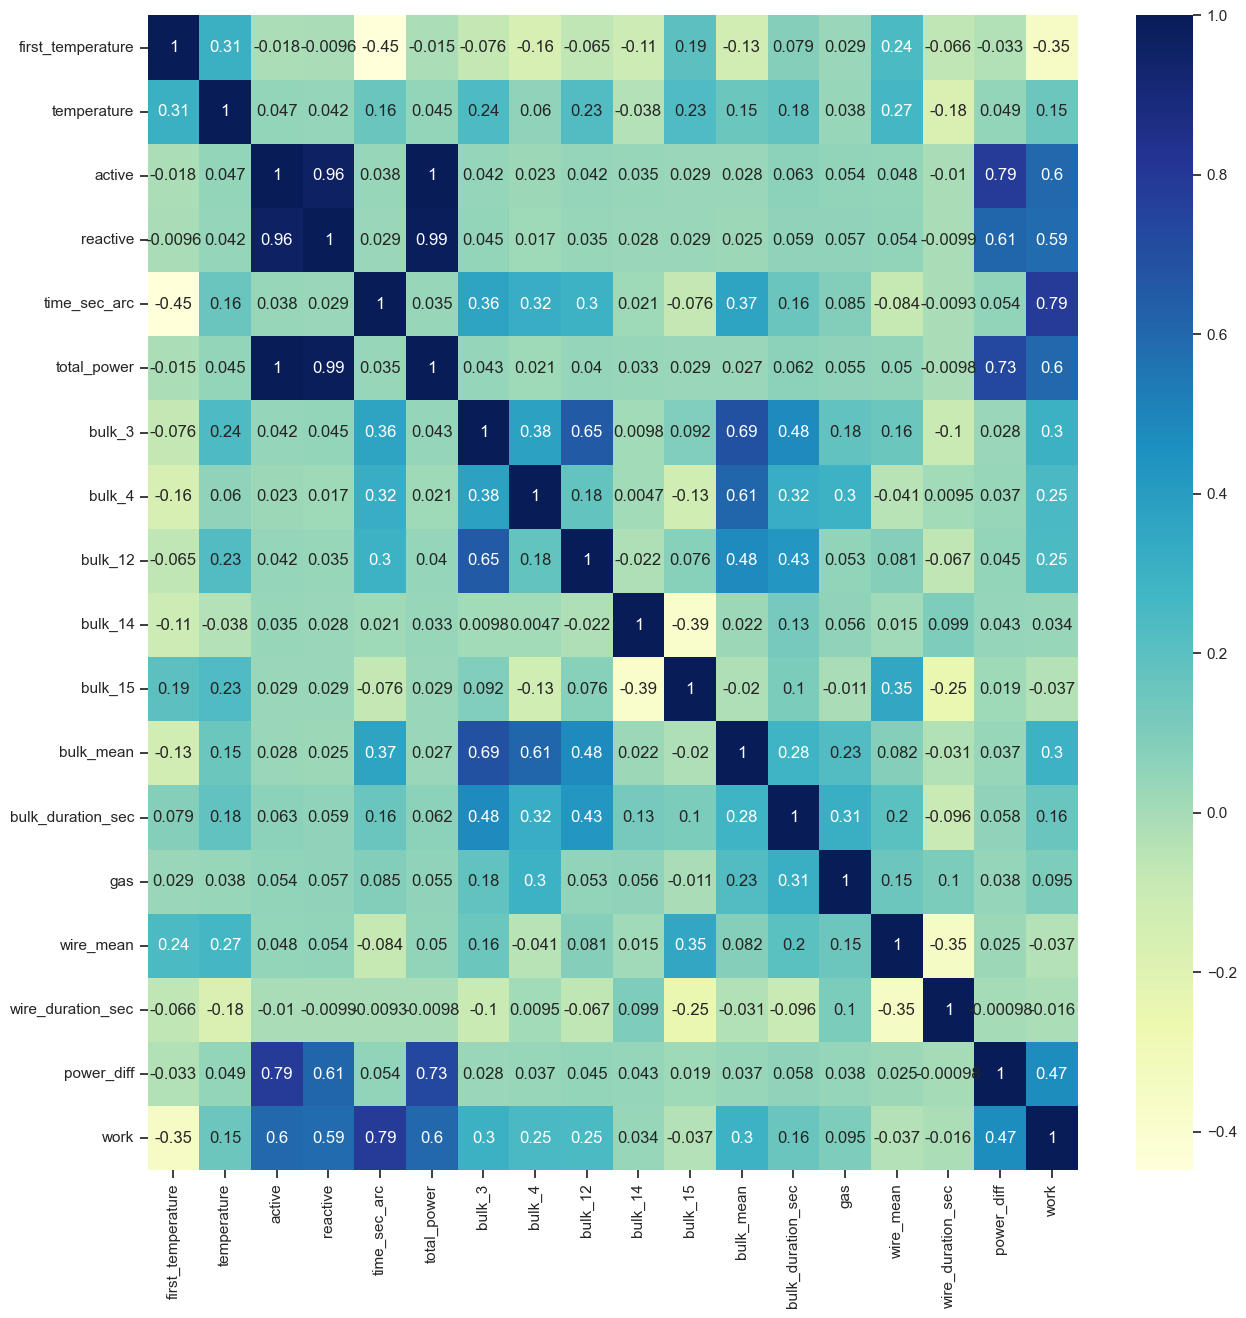

In [157]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(method='spearman'), cmap="YlGnBu", annot=True) 
plt.show()

Столбцы total_power, reactiva, active имеют высокий уровень кореляции. Если в случии с total_powe это понятно. Мы ее посчитали используя данные о активных и реактивных. То вот наличие кореляции между активной и реактивной не в полне понятно. Давайте просто удалим активные и реактивные оставим только тотал павр

In [158]:
data = data.drop(['active','reactive'], axis=1)

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2312 entries, 1 to 2499
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   first_temperature  2312 non-null   float64
 1   temperature        2312 non-null   float64
 2   time_sec_arc       2312 non-null   float64
 3   total_power        2312 non-null   float64
 4   bulk_3             2312 non-null   float64
 5   bulk_4             2312 non-null   float64
 6   bulk_12            2312 non-null   float64
 7   bulk_14            2312 non-null   float64
 8   bulk_15            2312 non-null   float64
 9   bulk_mean          2312 non-null   float64
 10  bulk_duration_sec  2312 non-null   int32  
 11  gas                2312 non-null   float64
 12  wire_mean          2312 non-null   float64
 13  wire_duration_sec  2312 non-null   int32  
 14  power_diff         2312 non-null   float64
 15  work               2312 non-null   float64
dtypes: float64(14), int32(2)
memo

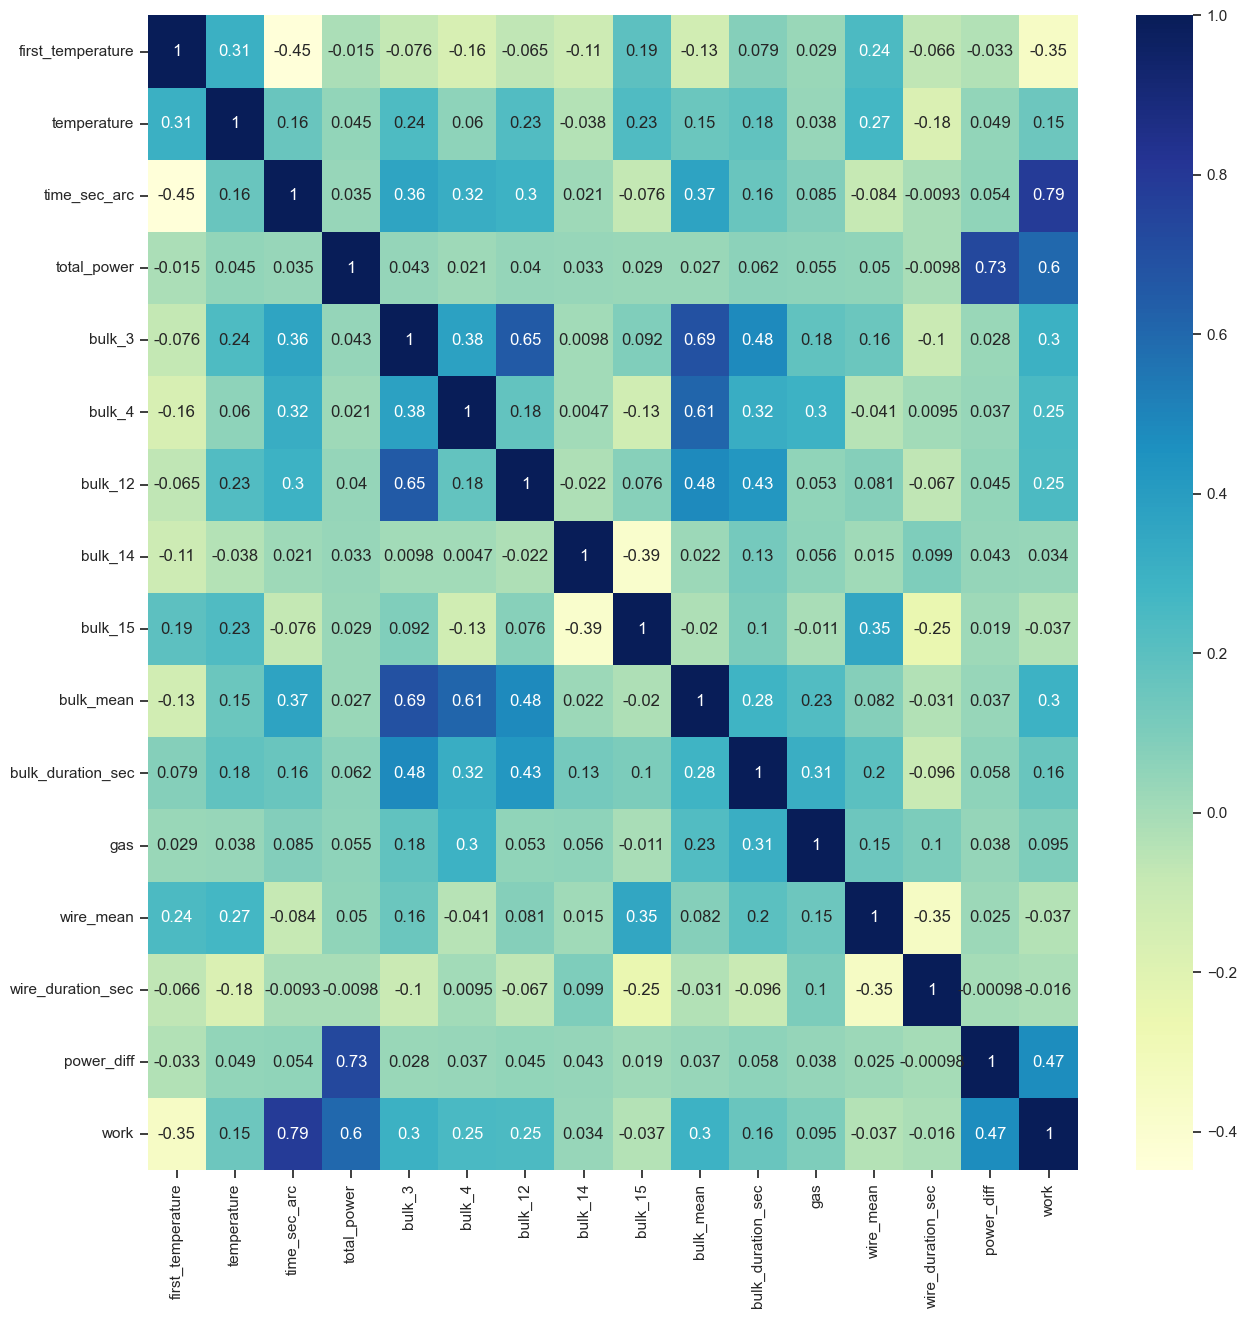

In [160]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(method='spearman'), cmap="YlGnBu", annot=True) 
plt.show()

Результат

Добавили два новых призныка. Это работу произведение между длительности в секундах и полной мощьностью. И разницу между активной и реактивной мощьностью Удалили выбросы из столббца mesure_time корелеционного анализа. После удаление активных и реактивных столбцов. Мультиколениальность была устронена

Подготовка данных
---

Разделим данны на тестовую и обучающший

In [161]:
y = data['temperature']
X = data.drop('temperature', axis=1)

In [162]:
columns = X.columns

In [164]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=random_state)

Обучение моделей машинного обучения
---

In [165]:
score = []
name = []

Масштабируем данные

In [167]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Создадим грид для линейной регресии

In [168]:
params={
    'fit_intercept': [True, False],
    'positive': [True, False]}

model_lr = LinearRegression()

gs_lr = GridSearchCV(model_lr, 
                      params,
                      cv=3, 
                      scoring='neg_mean_absolute_error',
                      verbose=True,
                      n_jobs=-1)
gs_lr.fit(x_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='neg_mean_absolute_error', verbose=True)

In [169]:
print(f"Best score: {gs_lr.best_score_:.3f}")
print(f"Best parameters: {gs_lr.best_params_}")
score.append(gs_lr.best_score_)
name.append(gs_lr.estimator)

Best score: -7.105
Best parameters: {'fit_intercept': True, 'positive': False}


Сделаем грид для рендом фореста

In [172]:
params = { 
    'n_estimators': [50, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10,15,25],
    
}

model_rf = RandomForestRegressor(random_state=random_state)

gs_rf = GridSearchCV(model_rf, 
                      params,
                      cv=3, 
                      scoring='neg_mean_absolute_error',
                      verbose=True,
                      n_jobs=-1)
gs_rf.fit(x_train, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


C:\Users\mukha\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
96 fits failed out of a total of 288.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
68 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mukha\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mukha\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\mukha\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\mukha\anaconda3\Lib\site-packages

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=91224),
             n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 10, 15, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='neg_mean_absolute_error', verbose=True)

In [173]:
print(f"Best score: {gs_rf.best_score_:.3f}")
print(f"Best parameters: {gs_rf.best_params_}")
score.append(gs_rf.best_score_)
name.append(gs_rf.estimator)

Best score: -7.036
Best parameters: {'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 500}


Сделаем грид для катбуста

In [174]:
model_cat = CatBoostRegressor(random_state=random_state)
params = {'depth' : [6,8,10],
        'learning_rate' : [0.01, 0.05, 0.1],
        'iterations'    : [30, 50, 100] }

cat_gs = GridSearchCV(model_cat,
                            params,
                            scoring='neg_mean_absolute_error',
                            cv=3,
                            verbose=True,
                            n_jobs=-1)
cat_gs.fit(x_train, y_train)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
0:	learn: 10.6662604	total: 57.5ms	remaining: 5.69s
1:	learn: 10.4713798	total: 60.7ms	remaining: 2.97s
2:	learn: 10.3107377	total: 63.2ms	remaining: 2.04s
3:	learn: 10.1767253	total: 65.8ms	remaining: 1.58s
4:	learn: 10.0305991	total: 68.7ms	remaining: 1.3s
5:	learn: 9.9110703	total: 71.9ms	remaining: 1.13s
6:	learn: 9.8055002	total: 75.3ms	remaining: 1s
7:	learn: 9.6832032	total: 78.2ms	remaining: 899ms
8:	learn: 9.5940701	total: 81ms	remaining: 819ms
9:	learn: 9.4854023	total: 83.6ms	remaining: 753ms
10:	learn: 9.3810060	total: 86.1ms	remaining: 697ms
11:	learn: 9.3111848	total: 88.5ms	remaining: 649ms
12:	learn: 9.2389946	total: 90.9ms	remaining: 608ms
13:	learn: 9.1752010	total: 93.4ms	remaining: 574ms
14:	learn: 9.1203078	total: 95.8ms	remaining: 543ms
15:	learn: 9.0604066	total: 98.4ms	remaining: 517ms
16:	learn: 9.0103203	total: 101ms	remaining: 493ms
17:	learn: 8.9580661	total: 104ms	remaining: 472ms
18:	learn: 8.919

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x00000159AFBA5DD0>,
             n_jobs=-1,
             param_grid={'depth': [6, 8, 10], 'iterations': [30, 50, 100],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='neg_mean_absolute_error', verbose=True)

In [175]:
print(f"Best score: {cat_gs.best_score_:.3f}")
print(f"Best parameters: {cat_gs.best_params_}")
score.append(cat_gs.best_score_)
name.append(cat_gs.estimator)

Best score: -6.901
Best parameters: {'depth': 6, 'iterations': 100, 'learning_rate': 0.1}


Алгоритм LGBM

In [178]:
model_lgb = lgb.LGBMRegressor(random_state=random_state)

params = {'n_estimators': [10, 50, 100],
             'learning_rate': [0.03, 0.1],
             'max_depth': [1, 10, 15]
         }

lgb_gs = GridSearchCV(model_lgb, 
                        params, 
                        cv=5, 
                        scoring='neg_mean_absolute_error')

lgb_gs.fit(x_train,y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000290 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2920
[LightGBM] [Info] Number of data points in the train set: 1387, number of used features: 15
[LightGBM] [Info] Start training from score 1593.328046
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2925
[LightGBM] [Info] Number of data points in the train set: 1387, number of used features: 15
[LightGBM] [Info] Start training from score 1593.212689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2935
[LightGBM] [Info] Number of data points in the train set: 1387, number of used features: 15
[LightGBM] [Info] Start training from score 1593.277578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2923
[LightGBM] [Info] Number of data points in the train set: 1388, number of used features: 15
[LightGBM] [Info] Start 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2935
[LightGBM] [Info] Number of data points in the train set: 1387, number of used features: 15
[LightGBM] [Info] Start training from score 1593.277578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2923
[LightGBM] [Info] Number of data points in the train set: 1388, number of used features: 15
[LightGBM] [Info] Start training from score 1593.547550
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2920
[LightGBM] [Info] Number of data points in the train set: 1387, number of used features: 15
[LightGBM] [Info] Start 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2920
[LightGBM] [Info] Number of data points in the train set: 1387, number of used features: 15
[LightGBM] [Info] Start training from score 1593.328046
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2935
[LightGBM] [Info] Number of data points in the train s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2920
[LightGBM] [Info] Number of data points in the train set: 1387, number of used features: 15
[LightGBM] [Info] Start training from score 1593.328046
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2917
[LightGBM] [Info] Number of data points in the train set: 1387, number of used features: 15
[LightGBM] [Info] Start training from score 1593.222783
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=91224),
             param_grid={'learning_rate': [0.03, 0.1], 'max_depth': [1, 10, 15],
                         'n_estimators': [10, 50, 100]},
             scoring='neg_mean_absolute_error')

In [179]:
print(f"Best score: {lgb_gs.best_score_:.3f}")
print(f"Best parameters: {lgb_gs.best_params_}")
score.append(lgb_gs.best_score_)
name.append(lgb_gs.estimator)

Best score: -7.059
Best parameters: {'learning_rate': 0.03, 'max_depth': 15, 'n_estimators': 100}


Алгоритм DummyRegressor

In [181]:
dummy_clf = DummyRegressor(strategy="mean")


params={}
dum_gs = GridSearchCV(dummy_clf, 
                        params, 
                        cv=5, 
                        scoring='neg_mean_absolute_error')

dum_gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DummyRegressor(), param_grid={},
             scoring='neg_mean_absolute_error')

In [182]:
print(f"Best score: {dum_gs.best_score_:.3f}")
print(f"Best parameters: {dum_gs.best_params_}")
score.append(dum_gs.best_score_)
name.append(dum_gs.estimator)

Best score: -7.914
Best parameters: {}


Выбор лучшей модели
---

In [183]:
best_model = pd.DataFrame({'model name': name,
                          'model mae': score})

In [184]:
best_model

,model name,model mae
0,LinearRegression(),-7.104538
1,RandomForestRegressor(random_state=91224),-7.036123
2,<catboost.core.CatBoostRegressor object at 0x0...,-6.901098
3,LGBMRegressor(random_state=91224),-7.058717
4,DummyRegressor(),-7.913936


Результат Как мы можем наблюдать наилучшей моделью является с небольшим отрывом CatBoostRegressor. Однако обучение данного алгоритма занила немного больше времени чем LGBM

Протестируем нашу лучшию модель

In [185]:
mean_absolute_error(y_test, cat_gs.predict(x_test))

6.8013105094767825

Значение MAE на тестовой выборке ровняется 6.8. Это соответсвует требованию заказчика о получении MAE  <=7 

Рассмотрим влияние важности призныков лучшей модели.

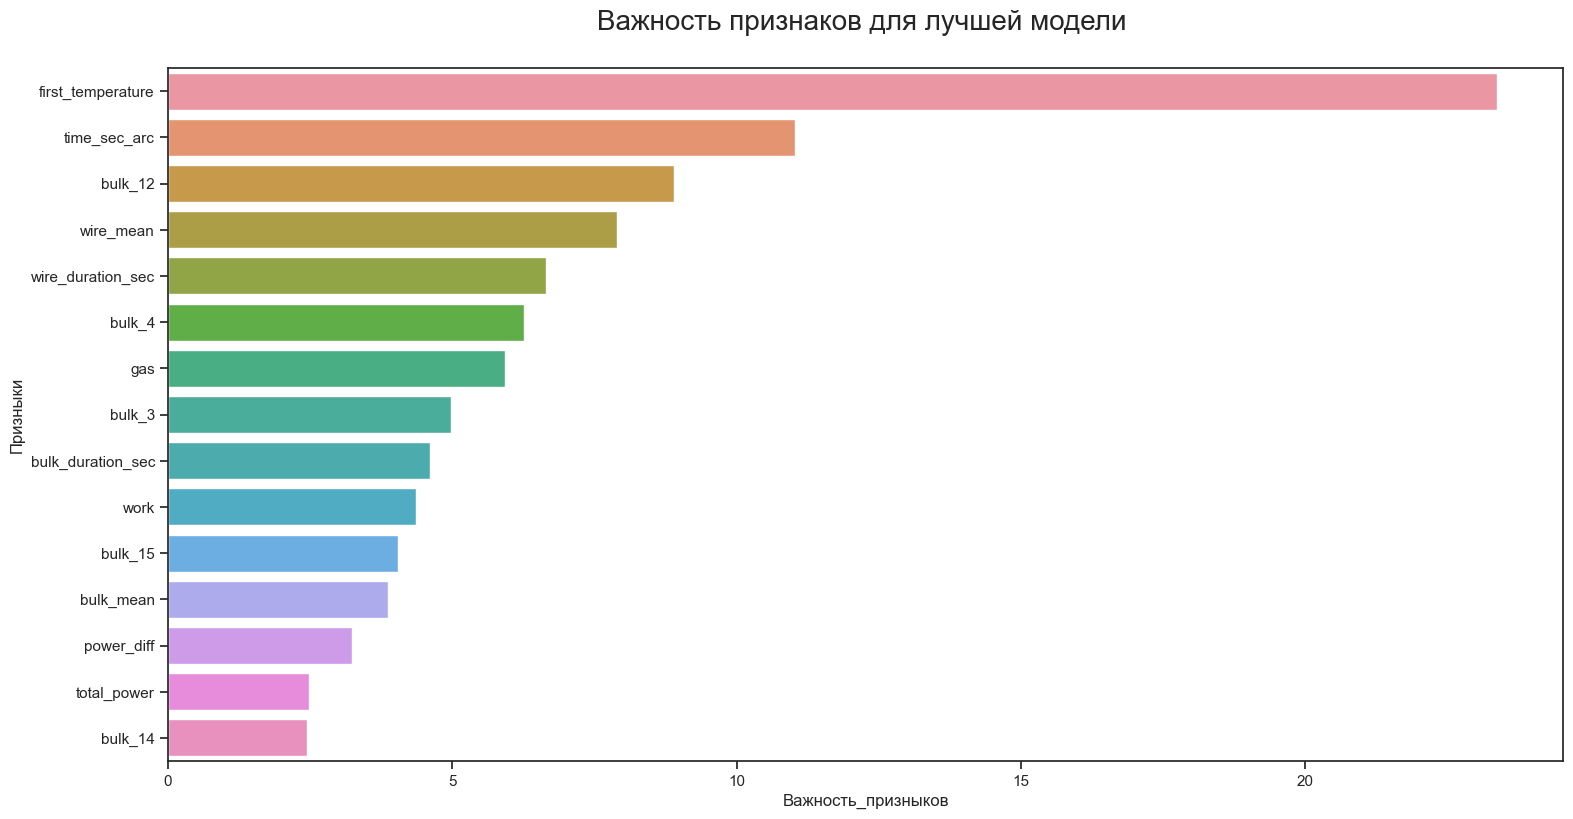

In [187]:
futcher = {
    'Призныки':columns,
    'Важность_призныков': cat_gs.best_estimator_.feature_importances_,
}
futcher = pd.DataFrame(futcher)
futcher.sort_values(by='Важность_призныков', ascending=False, inplace=True)
plt.figure(figsize=(18, 9))
sns.barplot(x=futcher['Важность_призныков'], y=futcher['Призныки'])
plt.title('Важность признаков для лучшей модели \n', fontsize=20)
plt.show()

Результат. После обучение 4 моделей наиболее лучшей было выявлено

Что наиболее лучший показатель имеется у catbosst

Так же на тестовой выборке используя алгоритм catboost была получена точность в 6.8 что соответсвует условию заказчика

Было выявлено что больше всего на алгоритм влияет следующие параметры

first_temperature : первая измеренная температура в партии

time_sec_arc : продолжительность нагрева

bulk_12 - 12 объем подоваемого маттериала

wire_mean - средний объем подачи проволки

wire_duration_sec - продолжительность подачи проволки по времени

Заказчику можно посоветовать уделять больше внимания первому замеру температуры , продолжительности нагрева , обьему подоваемого материала и обьему подоваемой проволки и так же длительности по времени падачи проволки

Вывод
---

В таблице об электродах

В датфрейме data_arc исправили названия столбцов. Посчитали разницу времени начало и конца. По формуле добавили полную мощьность .Тем самым добавили новыйе признык. 
Удалили не нужные столбцы. Явных дубликатов не обнаружено. Во всех столбцах имеются выбросы. 
В реактивных имелось не аномальное значение (удалили аномалию).


В таблице сыпучих материалов (data_bulk).

Откорректировали названия столбцов. Удалили столбцы с большим числом пропусков. 
Во всех данных имеются выбросы в той или ной степени . 
Данные распределены не нормальным оброзом.


В таблице сыпучих материалов время (data_bulk_time).

Исправили название столбцов.
Привели данные в правильны формат. Удалили столбцы с большим числом пропусков и добавили 
новыей пизныки максимального и минимального времени добовления материала и длительность по 
времени когда добовляли.


В таблице газ (data_gas)

Исправили название столбцов.


В таблице температуры (data_temp)

Откорректировали названия столбцов, удалили все пропуски. Привели данные в правильный формат.
Удалили аномальные значения. 


В таблице проволочных материалов (data_wire)

Исправили названия столбцов. Добавили новый признык


В таблице проволочных материалов время подачи (data_wire_time)

Исправили названия столбцов. Создали новые призныки. 


Объединение датафреймов

Из 7 таблиц нами была получена единая сводная по значению key таблица состоящая из 2500 записей и 15 столбцов + 1 столбец целевой признык.

В обьедененом датафрейме

Добавили два новых призныка. 

Выявили столбцы total_power, reactiva, active. Имеющие высокий уровень кореляции.
Удалили активных и реактивных столбцов. 

Мультиколениальность была устронена



Разедили данные 75% обучаюшяя; 25 % тестовая.

Масштабировали данные.

Обучили модели (с подборкой гиперпараметров). 

Результат обучения моделей 


Наиболее лучший показатель имеется показал catboost. 
С параметрами Best parameters: {'depth': 6, 'iterations': 100, 'learning_rate': 0.1}

Так же на тестовой выборке используя алгоритм catboost была получена точность в 6.8 что соответсвует условию заказчика.


Обзор влияние важности призныко лучшей модели.

Было выявлено что больше всего на алгоритм влияет следующие параметры.

first_temperature : первая измеренная температура в партии

time_sec_arc : продолжительность нагрева

bulk_12 - 12 объем подоваемого маттериала

wire_mean - средний объем подачи проволки

wire_duration_sec - продолжительность подачи проволки по времени

Заказчику можно посоветовать уделять больше внимания первому замеру температуры , продолжительности нагрева , обьему подоваемого материала и обьему подоваемой проволки и так же длительности по времени падачи проволки
